In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
# displays all of the columns in dataframes
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv("SHR76_21.csv", low_memory=False)
df.head()

,ID,CNTYFIPS,Ori,State,Agency,Agentype,Source,Solved,Year,StateName,Month,Incident,ActionType,Homicide,Situation,VicAge,VicSex,VicRace,VicEthnic,OffAge,OffSex,OffRace,OffEthnic,Weapon,Relationship,Circumstance,Subcircum,VicCount,OffCount,FileDate,MSA
0,197601001AKASP00,"Juneau, AK",AKASP00,Alaska,State Troopers,Primary state LE,FBI,Yes,1976,,January,1,Normal update,Murder or Non-negligent manslaughter,Single victim/single offender,48,Male,Native American,Unknown or not reported,55,Female,Native American,Unknown or not reported,Knife or cutting instrument,Husband,Other arguments,,0,0,030180,Rural Alaska
1,197601001AL00102,"Jefferson, AL",AL00102,Alabama,Birmingham,Municipal police,FBI,Yes,1976,,January,1,Normal update,Murder or Non-negligent manslaughter,Single victim/single offender,65,Male,Black,Unknown or not reported,67,Male,Black,Unknown or not reported,Shotgun,Acquaintance,Felon killed by private citizen,Felon killed in commission of a crime,0,0,030180,"Birmingham-Hoover, AL"
2,197601001AL00104,"Jefferson, AL",AL00104,Alabama,Fairfield,Municipal police,FBI,Yes,1976,,January,1,Normal update,Murder or Non-negligent manslaughter,Single victim/single offender,45,Female,Black,Unknown or not reported,53,Male,Black,Unknown or not reported,Shotgun,Wife,Other,,0,0,030180,"Birmingham-Hoover, AL"
3,197601001AL00106,"Jefferson, AL",AL00106,Alabama,Leeds,Municipal police,FBI,Yes,1976,,January,1,Normal update,Murder or Non-negligent manslaughter,Single victim/single offender,43,Male,Black,Unknown or not reported,35,Female,Black,Unknown or not reported,Knife or cutting instrument,Brother,Other arguments,,0,0,030180,"Birmingham-Hoover, AL"
4,197601001AL00201,"Mobile, AL",AL00201,Alabama,Mobile,Municipal police,FBI,Yes,1976,,January,1,Adjustment,Murder or Non-negligent manslaughter,Single victim/single offender,35,Male,White,Unknown or not reported,25,Female,White,Unknown or not reported,Strangulation - hanging,Acquaintance,Circumstances undetermined,,0,0,030180,"Mobile, AL"


In [3]:
df.shape

(849144, 31)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 849144 entries, 0 to 849143
Data columns (total 31 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   ID            849144 non-null  object
 1   CNTYFIPS      849144 non-null  object
 2   Ori           849144 non-null  object
 3   State         849144 non-null  object
 4   Agency        849144 non-null  object
 5   Agentype      849144 non-null  object
 6   Source        849144 non-null  object
 7   Solved        849144 non-null  object
 8   Year          849144 non-null  int64 
 9   StateName     849144 non-null  object
 10  Month         849144 non-null  object
 11  Incident      849144 non-null  int64 
 12  ActionType    849144 non-null  object
 13  Homicide      849144 non-null  object
 14  Situation     849144 non-null  object
 15  VicAge        849144 non-null  int64 
 16  VicSex        849144 non-null  object
 17  VicRace       849144 non-null  object
 18  VicEthnic     849144 non

In [5]:
df.describe()

,Year,Incident,VicAge,OffAge,VicCount,OffCount
count,849144.000000,849144.000000,849144.000000,849144.000000,849144.000000,849144.000000
mean,1997.610952,55.300693,47.474017,354.392947,0.130049,0.187782
std,13.392627,810.902538,118.439549,456.614516,0.566959,0.600314
min,1976.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1986.000000,1.000000,22.000000,24.000000,0.000000,0.000000
50%,1996.000000,2.000000,30.000000,38.000000,0.000000,0.000000
75%,2009.000000,11.000000,42.000000,999.000000,0.000000,0.000000
max,2021.000000,27113.000000,999.000000,999.000000,21.000000,40.000000


homicides span from 1976 to 2021. The victims's mean age is approximately 47.5 years and the median is 30 years. The youngest victim is less than a year old. The oldest victim is 999 years (this is likely a placeholder or an error, as it's not realistic).25% of victims are 22 years old or younger and 75% of victims are 42 years old or younger.

### Distribution of Solved vs Unsolved Cases

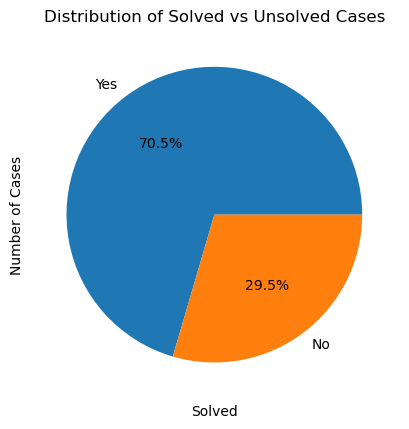

In [6]:
df['Solved'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Solved vs Unsolved Cases')
plt.xlabel('Solved')
plt.ylabel('Number of Cases')
plt.show()

At first glance, the pie chart shows that the majority of cases in this dataset is marked as solved. However, there's still a significant number of unsolved cases, which are primary interest for our analysis.

In [7]:
df.loc[df['Solved'] == 'No'].shape

(250790, 31)

### Distribution of Victims's Age

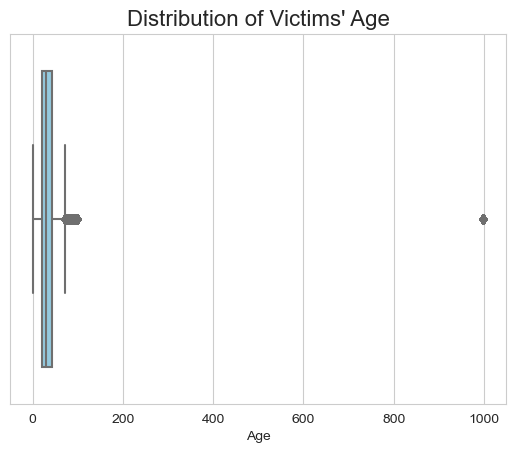

In [8]:
sns.set_style("whitegrid")
sns.boxplot(x=df['VicAge'], color='skyblue')
plt.title("Distribution of Victims' Age", fontsize=16)
plt.xlabel("Age")
plt.show()

In [9]:
df.loc[df['VicAge'] == 999].shape

(12722, 31)

In the VicAge column, there are 12,722 values that are 999 years in the data. The 999 age represents unidentified or unknown which indicates that the victim could not be identified, the body was in a state where age determination was challenging, or the case details were not adequately documented. Ultimately, excluding these records might inadverently ignore potential patterns or clusters of homicides that are of interest which would be wise to retain the "999" age values.

In [10]:
df['VicAgeCatg'] = [f'{i//10*10}-{i//10*10+10}' for i in df['VicAge']]
df['number_of_cases'] = 1

In [11]:
unsolved_cases = df[df['Solved'] == 'No']

In [12]:
vicage_df = unsolved_cases[unsolved_cases['VicAgeCatg'] != '990-1000']
age_sorted = vicage_df.groupby('VicAgeCatg').sum().reset_index()[['VicAgeCatg','number_of_cases']]
age_sorted['Percentage'] = (age_sorted['number_of_cases'] / (age_sorted['number_of_cases'].sum())*100).round(decimals=1)
age_sorted

C:\Users\User\AppData\Local\Temp\ipykernel_6200\3093180961.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  age_sorted = vicage_df.groupby('VicAgeCatg').sum().reset_index()[['VicAgeCatg','number_of_cases']]


,VicAgeCatg,number_of_cases,Percentage
0,0-10,3683,1.5
1,10-20,30254,12.4
2,20-30,91443,37.4
3,30-40,55454,22.7
4,40-50,29647,12.1
5,50-60,16974,6.9
6,60-70,9023,3.7
7,70-80,4927,2.0
8,80-90,2378,1.0
9,90-100,462,0.2


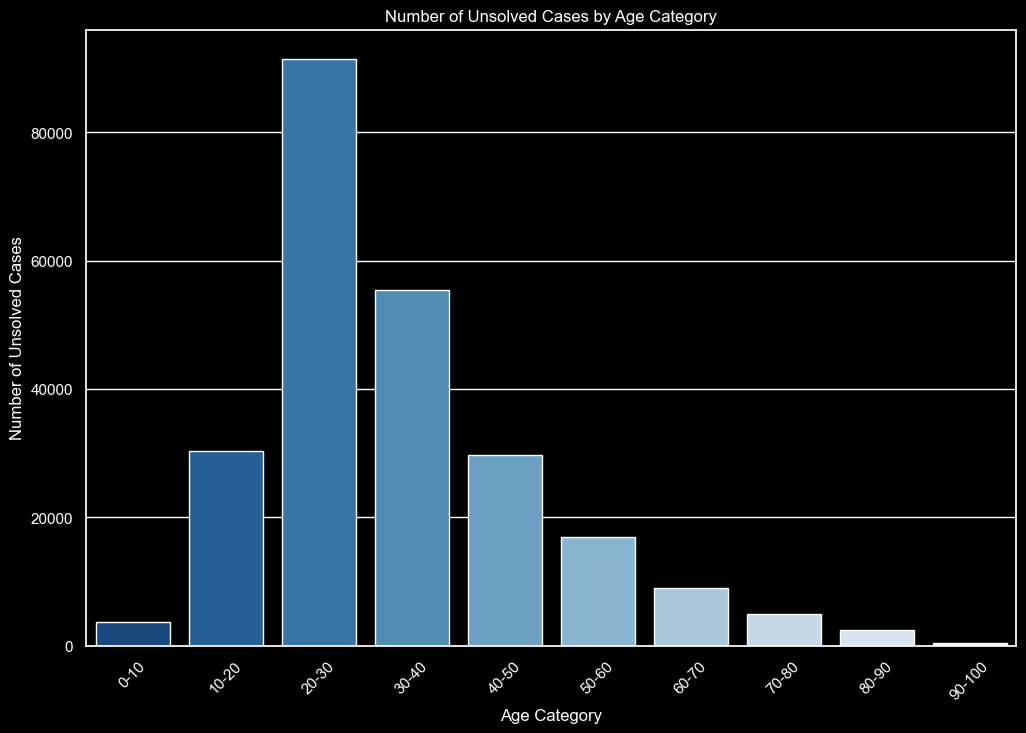

In [123]:
sns.set(style='darkgrid')
plt.style.use('dark_background')
# Create a horizontal bar plot of the number of unsolved cases in each age category
plt.figure(figsize=(12,8))
ax = sns.barplot(x='VicAgeCatg', y='number_of_cases', data=age_sorted, palette='Blues_r')
plt.title('Number of Unsolved Cases by Age Category')
plt.xlabel('Age Category')
plt.ylabel('Number of Unsolved Cases')
plt.xticks(rotation=45)

# Add the percentage of cases above each bar
for i, p in enumerate(ax.patches):
    ax.annotate(f"{age_sorted['Percentage'].iloc[i]}%", (p.get_x() + p.get_width()/2., p.get_height()),
                ha='center', va='bottom', color='black')

plt.savefig('victim_age_distribution.png')
plt.show()

The bar plot visualizes the number of unsolved cases in each age category. The x-axis represents the age categories, ranging from '0-10' to '90-100', and the y-axis represents the number of unsolved cases in each age category.

The height of each bar represents the number of unsolved cases in that age category, and the percentage displayed above each bar represents the percentage of the total unsolved cases that each age category accounts for.

For example, the '20-30' age category has the highest number of unsolved cases, and it accounts for 36.3% of all unsolved cases. This is followed by the '30-40' age category, which has the second-highest number of unsolved cases and accounts for 22.9% of all unsolved cases.

This visualization helps to highlight the age categories with the highest number of unsolved cases, which can be useful for identifying patterns or trends in the data that may be indicative of serial killer activity.

### Victim's Gender Distribution

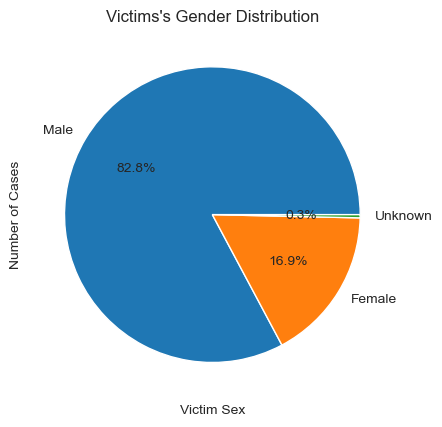

In [14]:
unsolved_cases['VicSex'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Victims's Gender Distribution")
plt.xlabel('Victim Sex')
plt.ylabel('Number of Cases')
plt.show()

The majority of victims are male. However, a significant number of females have also been victims of homicides. Analyzing gender-based patterns in unsolved cases could be insightful.

In [15]:
unsolved_cases.loc[df['VicSex'] == 'Unknown'].shape[0]

871

In the context of the `VicSex` column, "Unknown" refers to situations where the gender of the victim couldn't be determined. 

### Top 10 Relationships of Offender to Victim

In [96]:
relationships_counts = unsolved_cases['Relationship'].value_counts().head()
relationships_counts

Relationship not determined    232985
Stranger                        11151
Other - known to victim          2814
Acquaintance                     2754
Friend                            283
Name: Relationship, dtype: int64

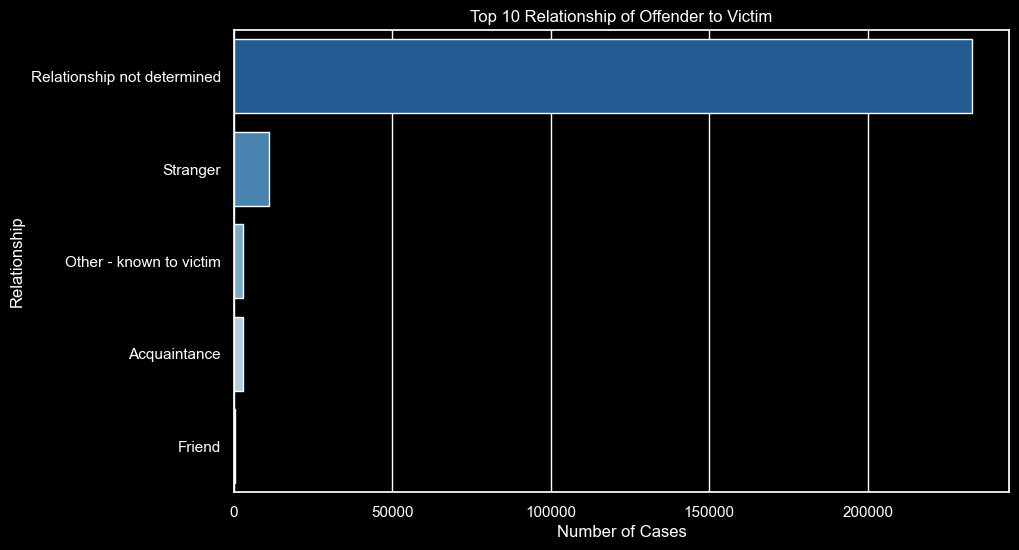

In [108]:
sns.set(style='darkgrid')
plt.style.use('dark_background')
plt.figure(figsize=(10, 6))
sns.barplot(x=relationships_counts.values, y=relationships_counts.index, palette='Blues_r')
plt.title('Top 10 Relationship of Offender to Victim')
plt.xlabel('Number of Cases')
plt.ylabel('Relationship')
plt.show()

The most common relationship where homicides occured was between acquaintances, followed by strangers. This distribution is intriguing. Serial killers often target strangers, so the high number of stranger-related crimes might be of particular interest for my analysis.

In [18]:
unsolved_cases.loc[df['Relationship'] == 'Relationship not determined'].shape[0]

232985

The value "Relationship not determined" in the Relationship column indicates that the relationship between the victim and the offender was not established or ascertained at the time the data was recorded. While it is tempting to assume that "Relationship not determined" equates to "stranger," it's important to differentiate between the two since it can lead to incorrect interpretations. In the context of analyzing patterns for potential serial killer activities, the differentiation can be crucial. Serial killers might target both known individuals (though less common) and strangers. Being precise about these categories can help in identifying accurate patterns.

### Distribution of Weapons Used

In [102]:
weapon_counts = df['Weapon'].value_counts()
weapon_counts

Handgun - pistol, revolver, etc         399006
Knife or cutting instrument             120846
Firearm, type not stated                 79175
Personal weapons, includes beating       47637
Other or type unknown                    45959
Shotgun                                  39307
Blunt object - hammer, club, etc         36374
Rifle                                    30960
Strangulation - hanging                  10093
Fire                                      7809
Asphyxiation - includes death by gas      5087
Other gun                                 3581
Narcotics or drugs, sleeping pills        3052
Drowning                                  1508
Poison - does not include gas              587
Explosives                                 567
Pushed or thrown out window                260
Name: Weapon, dtype: int64

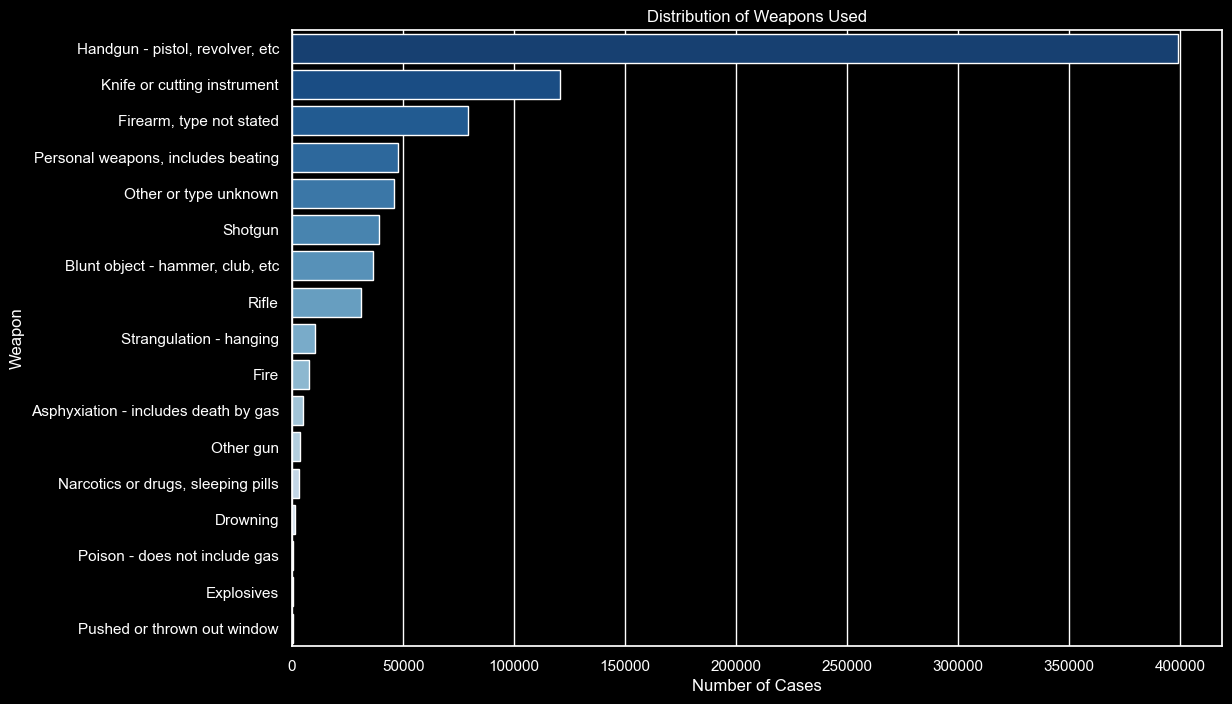

In [125]:
sns.set(style='darkgrid')
plt.style.use('dark_background')
plt.figure(figsize=(12, 8))
sns.barplot(x=weapon_count.values, y=weapon_counts.index, palette='Blues_r')
plt.title('Distribution of Weapons Used')
plt.xlabel('Number of Cases')
plt.ylabel('Weapon')
plt.savefig('weapon_distribution.png')
plt.show()

The most common weapon used in homicides is a "Handgun-pistol, revolver, etc.", followed by "Knife or cutting instrument." Weapons are crucial clues in our analysis as they could hint at patterns consistent with serial killer activities. If a specific weapon type is predominantly found in unsolved cases, it's potential area of focus.

### Temporal Trends of Homicides

In [20]:
# Number of homicides over the years
yearly_counts = df.groupby(['Year', 'Solved']).size().unstack()
yearly_counts.head()

Solved,No,Yes
Year,,
1976,3702,13917
1977,4616,14228
1978,4531,14992
1979,5669,16029
1980,6363,16729


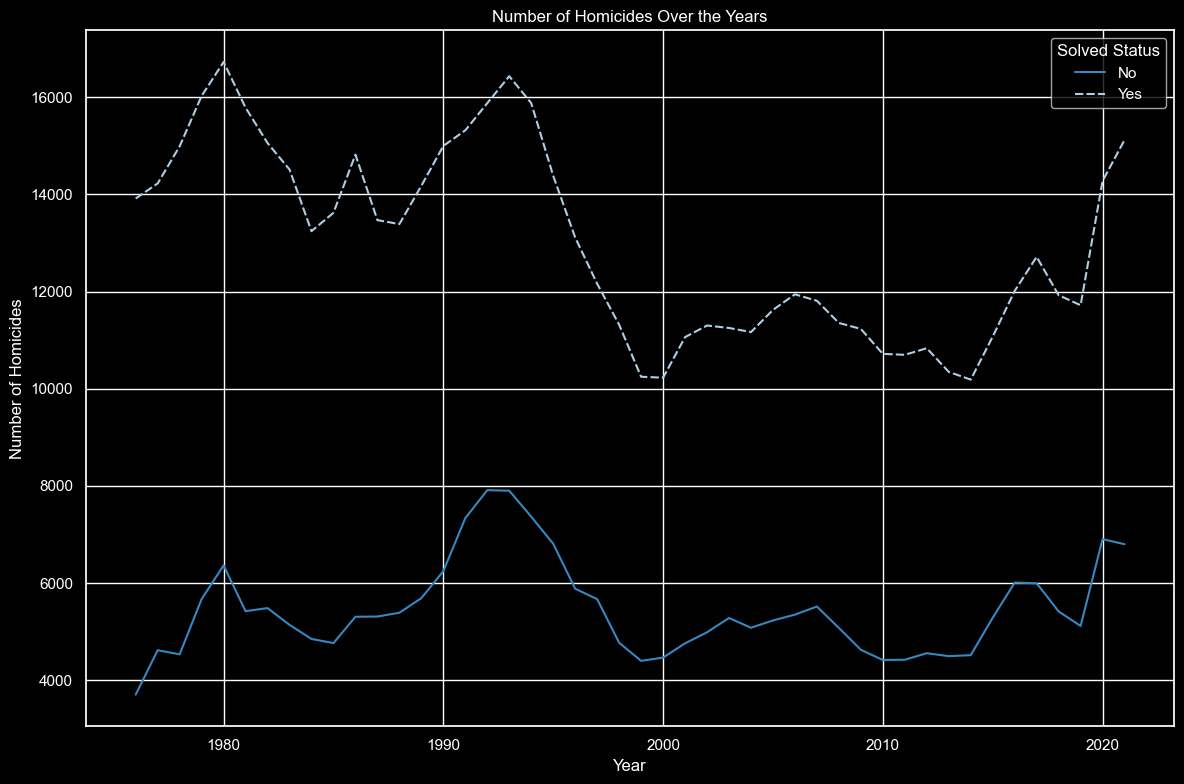

In [126]:
# Plotting temporal trends
sns.set_style("darkgrid")
plt.style.use('dark_background')
plt.figure(figsize=(12, 8))
sns.lineplot(yearly_counts, palette='Blues_r')
plt.title("Number of Homicides Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Homicides")
plt.legend(title="Solved Status")
plt.tight_layout()
plt.savefig('yearly_homicides.png')
plt.show()

This line chart displays the number of solved and unsolved homicides over the years. While the number of solved cases has seen fluctuations, the number of unsolved cases has shown an increasing trend in recent years.

### Top 10 States with the Highest Number of Unsolved Cases

In [22]:
# Top states/counties with the highest number of unsolved cases
# Extract state abbreviation from the CNTYFIPS column
df['State'] = df['CNTYFIPS'].str.split(',').str[1].str.strip()
unsolved_by_state = df[df['Solved'] == 'No'].groupby('State').size().sort_values(ascending=False).head(10)
unsolved_by_state

State
CA    45963
NY    27424
TX    18724
IL    14836
FL    13981
MI    11950
MD     9272
PA     8604
LA     8039
OH     7812
dtype: int64

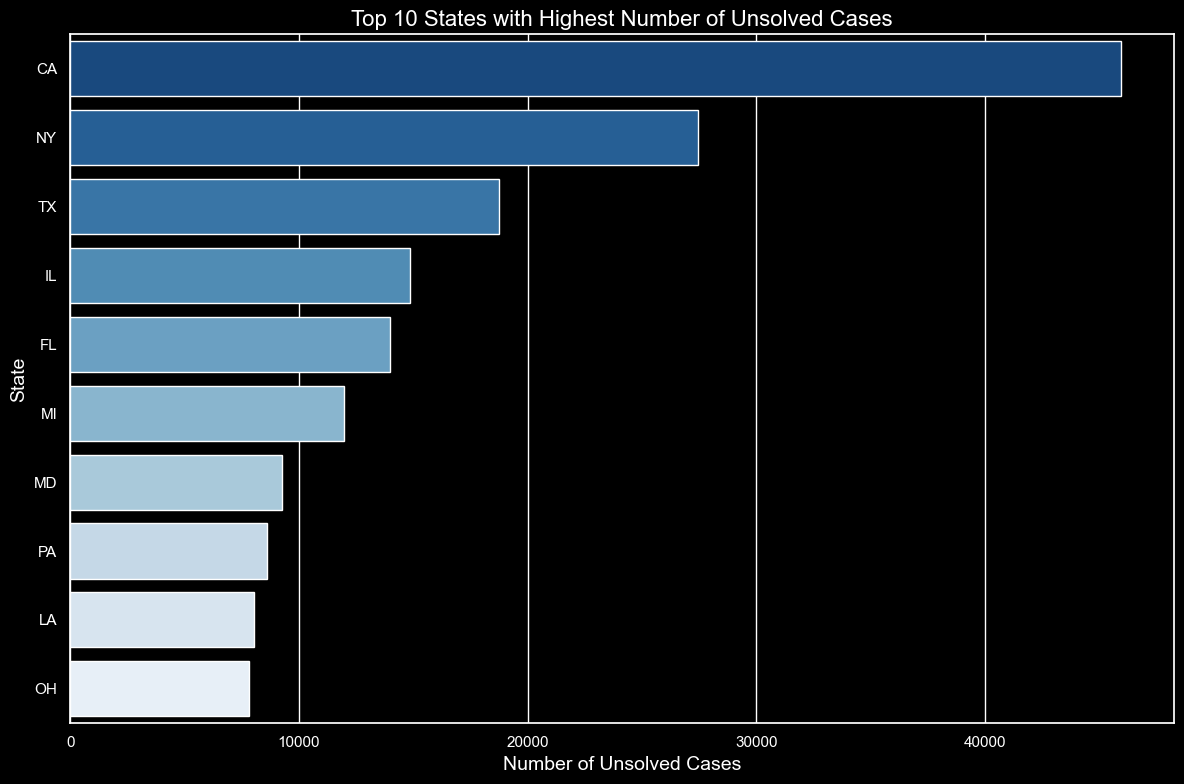

In [128]:
# Plotting geographical distribution
sns.set_style('darkgrid')
plt.style.use('dark_background')
plt.figure(figsize=(12,8))
sns.barplot(x=unsolved_by_state.values, y=unsolved_by_state.index, palette='Blues_r')
plt.title("Top 10 States with Highest Number of Unsolved Cases", fontsize=16)
plt.xlabel("Number of Unsolved Cases", fontsize=14)
plt.ylabel("State", fontsize=14)
# Adjusting the layout
plt.tight_layout()
plt.savefig('states_homicides.png')
plt.show()

The bar chart reveals that California, New York, and Texas are the top three states with the most unsolved homicide cases.

## Data Cleaning and Preprocessing

In [24]:
df.head()

,ID,CNTYFIPS,Ori,State,Agency,Agentype,Source,Solved,Year,StateName,Month,Incident,ActionType,Homicide,Situation,VicAge,VicSex,VicRace,VicEthnic,OffAge,OffSex,OffRace,OffEthnic,Weapon,Relationship,Circumstance,Subcircum,VicCount,OffCount,FileDate,MSA,VicAgeCatg,number_of_cases
0,197601001AKASP00,"Juneau, AK",AKASP00,AK,State Troopers,Primary state LE,FBI,Yes,1976,,January,1,Normal update,Murder or Non-negligent manslaughter,Single victim/single offender,48,Male,Native American,Unknown or not reported,55,Female,Native American,Unknown or not reported,Knife or cutting instrument,Husband,Other arguments,,0,0,030180,Rural Alaska,40-50,1
1,197601001AL00102,"Jefferson, AL",AL00102,AL,Birmingham,Municipal police,FBI,Yes,1976,,January,1,Normal update,Murder or Non-negligent manslaughter,Single victim/single offender,65,Male,Black,Unknown or not reported,67,Male,Black,Unknown or not reported,Shotgun,Acquaintance,Felon killed by private citizen,Felon killed in commission of a crime,0,0,030180,"Birmingham-Hoover, AL",60-70,1
2,197601001AL00104,"Jefferson, AL",AL00104,AL,Fairfield,Municipal police,FBI,Yes,1976,,January,1,Normal update,Murder or Non-negligent manslaughter,Single victim/single offender,45,Female,Black,Unknown or not reported,53,Male,Black,Unknown or not reported,Shotgun,Wife,Other,,0,0,030180,"Birmingham-Hoover, AL",40-50,1
3,197601001AL00106,"Jefferson, AL",AL00106,AL,Leeds,Municipal police,FBI,Yes,1976,,January,1,Normal update,Murder or Non-negligent manslaughter,Single victim/single offender,43,Male,Black,Unknown or not reported,35,Female,Black,Unknown or not reported,Knife or cutting instrument,Brother,Other arguments,,0,0,030180,"Birmingham-Hoover, AL",40-50,1
4,197601001AL00201,"Mobile, AL",AL00201,AL,Mobile,Municipal police,FBI,Yes,1976,,January,1,Adjustment,Murder or Non-negligent manslaughter,Single victim/single offender,35,Male,White,Unknown or not reported,25,Female,White,Unknown or not reported,Strangulation - hanging,Acquaintance,Circumstances undetermined,,0,0,030180,"Mobile, AL",30-40,1


In [25]:
# Drop unnecessary columns 
df.drop(columns=['ID', 'Ori', 'Agency', 'Agentype', 'Source', 'StateName',
               'Incident', 'ActionType','Situation','Circumstance', 
               'Subcircum', 'VicCount', 'OffCount', 'FileDate'
               ], inplace=True)

In [26]:
df.isnull().sum()

CNTYFIPS              0
State              9151
Solved                0
Year                  0
Month                 0
Homicide              0
VicAge                0
VicSex                0
VicRace               0
VicEthnic             0
OffAge                0
OffSex                0
OffRace               0
OffEthnic             0
Weapon                0
Relationship          0
MSA                   0
VicAgeCatg            0
number_of_cases       0
dtype: int64

In [27]:
df.loc[df['State'].isnull()].shape

(9151, 19)

There are 9151 missing values in the State column.

In [28]:
df.loc[df['State'].isnull(), 'CNTYFIPS'].value_counts()

District of Columbia    9151
Name: CNTYFIPS, dtype: int64

It appears that all the missing values in the `State` column correspond to records from the District of Columbia (D.C.).

In [29]:
df['State'].fillna('D.C.', inplace=True)

In [30]:
df['State'].isnull().sum()

0

In [31]:
df.head()

,CNTYFIPS,State,Solved,Year,Month,Homicide,VicAge,VicSex,VicRace,VicEthnic,OffAge,OffSex,OffRace,OffEthnic,Weapon,Relationship,MSA,VicAgeCatg,number_of_cases
0,"Juneau, AK",AK,Yes,1976,January,Murder or Non-negligent manslaughter,48,Male,Native American,Unknown or not reported,55,Female,Native American,Unknown or not reported,Knife or cutting instrument,Husband,Rural Alaska,40-50,1
1,"Jefferson, AL",AL,Yes,1976,January,Murder or Non-negligent manslaughter,65,Male,Black,Unknown or not reported,67,Male,Black,Unknown or not reported,Shotgun,Acquaintance,"Birmingham-Hoover, AL",60-70,1
2,"Jefferson, AL",AL,Yes,1976,January,Murder or Non-negligent manslaughter,45,Female,Black,Unknown or not reported,53,Male,Black,Unknown or not reported,Shotgun,Wife,"Birmingham-Hoover, AL",40-50,1
3,"Jefferson, AL",AL,Yes,1976,January,Murder or Non-negligent manslaughter,43,Male,Black,Unknown or not reported,35,Female,Black,Unknown or not reported,Knife or cutting instrument,Brother,"Birmingham-Hoover, AL",40-50,1
4,"Mobile, AL",AL,Yes,1976,January,Murder or Non-negligent manslaughter,35,Male,White,Unknown or not reported,25,Female,White,Unknown or not reported,Strangulation - hanging,Acquaintance,"Mobile, AL",30-40,1


In [32]:
df['County'] = df['CNTYFIPS'].str.split(',').str[0].str.strip()

In [33]:
df.head()

,CNTYFIPS,State,Solved,Year,Month,Homicide,VicAge,VicSex,VicRace,VicEthnic,OffAge,OffSex,OffRace,OffEthnic,Weapon,Relationship,MSA,VicAgeCatg,number_of_cases,County
0,"Juneau, AK",AK,Yes,1976,January,Murder or Non-negligent manslaughter,48,Male,Native American,Unknown or not reported,55,Female,Native American,Unknown or not reported,Knife or cutting instrument,Husband,Rural Alaska,40-50,1,Juneau
1,"Jefferson, AL",AL,Yes,1976,January,Murder or Non-negligent manslaughter,65,Male,Black,Unknown or not reported,67,Male,Black,Unknown or not reported,Shotgun,Acquaintance,"Birmingham-Hoover, AL",60-70,1,Jefferson
2,"Jefferson, AL",AL,Yes,1976,January,Murder or Non-negligent manslaughter,45,Female,Black,Unknown or not reported,53,Male,Black,Unknown or not reported,Shotgun,Wife,"Birmingham-Hoover, AL",40-50,1,Jefferson
3,"Jefferson, AL",AL,Yes,1976,January,Murder or Non-negligent manslaughter,43,Male,Black,Unknown or not reported,35,Female,Black,Unknown or not reported,Knife or cutting instrument,Brother,"Birmingham-Hoover, AL",40-50,1,Jefferson
4,"Mobile, AL",AL,Yes,1976,January,Murder or Non-negligent manslaughter,35,Male,White,Unknown or not reported,25,Female,White,Unknown or not reported,Strangulation - hanging,Acquaintance,"Mobile, AL",30-40,1,Mobile


In [34]:
df['OffSex'].unique()

array(['Female', 'Male', 'Unknown'], dtype=object)

In [35]:
df['solved_code'] = df['OffSex'].apply(lambda x: 0 if x == 'Unknown' else 1)

In [36]:
df['solved_code'].value_counts()

1    596797
0    252347
Name: solved_code, dtype: int64

In [37]:
gender_mapping = {'Male': 1, 'Female': 2}
df['vicsex_code'] = df['VicSex'].map(gender_mapping).fillna(9).astype(int)

In [38]:
df[['OffSex', 'solved_code', 'VicSex', 'vicsex_code']].head()

,OffSex,solved_code,VicSex,vicsex_code
0,Female,1,Male,1
1,Male,1,Male,1
2,Male,1,Female,2
3,Female,1,Male,1
4,Female,1,Male,1


In [39]:
df['State'].unique()

array(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'D.C.', 'DE', 'FL', 'GA',
       'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
       'MI', 'MN', 'MO', 'MS', 'NE', 'NC', 'ND', 'NH', 'NJ', 'NM', 'NV',
       'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'TN', 'TX', 'VA', 'WA',
       'WI', 'WV', 'WY', 'MT', 'SD', 'UT', 'VT'], dtype=object)

In [40]:
state_to_fips = {
    "AL": "01", "AK": "02", "AZ": "04", "AR": "05", "CA": "06", "CO": "08", "CT": "09",
    "DE": "10", "D.C.": "11", "FL": "12", "GA": "13", "HI": "15", "ID": "16", "IL": "17",
    "IN": "18", "IA": "19", "KS": "20", "KY": "21", "LA": "22", "ME": "23", "MD": "24",
    "MA": "25", "MI": "26", "MN": "27", "MS": "28", "MO": "29", "MT": "30", "NE": "31",
    "NV": "32", "NH": "33", "NJ": "34", "NM": "35", "NY": "36", "NC": "37", "ND": "38",
    "OH": "39", "OK": "40", "OR": "41", "PA": "42", "RI": "44", "SC": "45", "SD": "46",
    "TN": "47", "TX": "48", "UT": "49", "VT": "50", "VA": "51", "WA": "53", "WV": "54",
    "WI": "55", "WY": "56"
}
df['state_fips'] = df['State'].map(state_to_fips)

In [41]:
df[['State', 'state_fips']].head()

,State,state_fips
0,AK,02
1,AL,01
2,AL,01
3,AL,01
4,AL,01


In [42]:
df.head()

,CNTYFIPS,State,Solved,Year,Month,Homicide,VicAge,VicSex,VicRace,VicEthnic,OffAge,OffSex,OffRace,OffEthnic,Weapon,Relationship,MSA,VicAgeCatg,number_of_cases,County,solved_code,vicsex_code,state_fips
0,"Juneau, AK",AK,Yes,1976,January,Murder or Non-negligent manslaughter,48,Male,Native American,Unknown or not reported,55,Female,Native American,Unknown or not reported,Knife or cutting instrument,Husband,Rural Alaska,40-50,1,Juneau,1,1,02
1,"Jefferson, AL",AL,Yes,1976,January,Murder or Non-negligent manslaughter,65,Male,Black,Unknown or not reported,67,Male,Black,Unknown or not reported,Shotgun,Acquaintance,"Birmingham-Hoover, AL",60-70,1,Jefferson,1,1,01
2,"Jefferson, AL",AL,Yes,1976,January,Murder or Non-negligent manslaughter,45,Female,Black,Unknown or not reported,53,Male,Black,Unknown or not reported,Shotgun,Wife,"Birmingham-Hoover, AL",40-50,1,Jefferson,1,2,01
3,"Jefferson, AL",AL,Yes,1976,January,Murder or Non-negligent manslaughter,43,Male,Black,Unknown or not reported,35,Female,Black,Unknown or not reported,Knife or cutting instrument,Brother,"Birmingham-Hoover, AL",40-50,1,Jefferson,1,1,01
4,"Mobile, AL",AL,Yes,1976,January,Murder or Non-negligent manslaughter,35,Male,White,Unknown or not reported,25,Female,White,Unknown or not reported,Strangulation - hanging,Acquaintance,"Mobile, AL",30-40,1,Mobile,1,1,01


In [43]:
df['CNTYFIPS'] = df['CNTYFIPS'].str.strip()

In [44]:
county_to_fips = {
    'Autauga, AL':'001',
'Baldwin, AL':'003',
'Barbour, AL':'005',
'Bibb, AL':'007',
'Blount, AL':'009',
'Bullock, AL':'011',
'Butler, AL':'013',
'Calhoun, AL':'015',
'Chambers, AL':'017',
'Cherokee, AL':'019',
'Chilton, AL':'021',
'Choctaw, AL':'023',
'Clarke, AL':'025',
'Clay, AL':'027',
'Cleburne, AL':'029',
'Coffee, AL':'031',
'Colbert, AL':'033',
'Conecuh, AL':'035',
'Coosa, AL':'037',
'Covington, AL':'039',
'Crenshaw, AL':'041',
'Cullman, AL':'043',
'Dale, AL':'045',
'Dallas, AL':'047',
'De Kalb, AL':'049',
'Elmore, AL':'051',
'Escambia, AL':'053',
'Etowah, AL':'055',
'Fayette, AL':'057',
'Franklin, AL':'059',
'Geneva, AL':'061',
'Greene, AL':'063',
'Hale, AL':'065',
'Henry, AL':'067',
'Houston, AL':'069',
'Jackson, AL':'071',
'Jefferson, AL':'073',
'Lamar, AL':'075',
'Lauderdale, AL':'077',
'Lawrence, AL':'079',
'Lee, AL':'081',
'Limestone, AL':'083',
'Lowndes, AL':'085',
'Macon, AL':'087',
'Madison, AL':'089',
'Marengo, AL':'091',
'Marion, AL':'093',
'Marshall, AL':'095',
'Mobile, AL':'097',
'Monroe, AL':'099',
'Montgomery, AL':'101',
'Morgan, AL':'103',
'Perry, AL':'105',
'Pickens, AL':'107',
'Pike, AL':'109',
'Randolph, AL':'111',
'Russell, AL':'113',
'St. Clair, AL':'115',
'Shelby, AL':'117',
'Sumter, AL':'119',
'Talladega, AL':'121',
'Tallapoosa, AL':'123',
'Tuscaloosa, AL':'125',
'Walker, AL':'127',
'Washington, AL':'129',
'Wilcox, AL':'131',
'Winston, AL':'133',
'Aleutians East, AK':'013',
'Aleutians West, AK':'016',
'Anchorage, AK':'020',
'Bethel, AK':'050',
'Bristol Bay, AK':'060',
'Denali, AK':'068',
'Dillingham, AK':'070',
'Fairbanks North Star, AK':'090',
'Haines, AK':'100',
'Juneau, AK':'110',
'Kenai Peninsula, AK':'122',
'Ketchikan Gateway, AK':'130',
'Kodiak Island, AK':'150',
'Lake and Peninsula, AK':'164',
'Matanuska-Susitna, AK':'170',
'Nome, AK':'180',
'North Slope, AK':'185',
'Northwest Arctic, AK':'188',
'Prince of Wales-Outer Ketchikan, AK':'201',
'Sitka, AK':'220',
'Skagway-Hoonah-Angoon, AK':'232',
'Southeast Fairbanks, AK':'240',
'Valdez-Cordova, AK':'261',
'Wade Hampton, AK':'270',
'Wrangell-Petersburg, AK':'280',
'Yakutat, AK':'282',
'Yukon-Koyukuk, AK':'290',
'Apache, AZ':'001',
'Cochise, AZ':'003',
'Coconino, AZ':'005',
'Gila, AZ':'007',
'Graham, AZ':'009',
'Greenlee, AZ':'011',
'La Paz, AZ':'012',
'Maricopa, AZ':'013',
'Mohave, AZ':'015',
'Navajo, AZ':'017',
'Pima, AZ':'019',
'Pinal, AZ':'021',
'Santa Cruz, AZ':'023',
'Yavapai, AZ':'025',
'Yuma, AZ':'027',
'Arkansas, AR':'001',
'Ashley, AR':'003',
'Baxter, AR':'005',
'Benton, AR':'007',
'Boone, AR':'009',
'Bradley, AR':'011',
'Calhoun, AR':'013',
'Carroll, AR':'015',
'Chicot, AR':'017',
'Clark, AR':'019',
'Clay, AR':'021',
'Cleburne, AR':'023',
'Cleveland, AR':'025',
'Columbia, AR':'027',
'Conway, AR':'029',
'Craighead, AR':'031',
'Crawford, AR':'033',
'Crittenden, AR':'035',
'Cross, AR':'037',
'Dallas, AR':'039',
'Desha, AR':'041',
'Drew, AR':'043',
'Faulkner, AR':'045',
'Franklin, AR':'047',
'Fulton, AR':'049',
'Garland, AR':'051',
'Grant, AR':'053',
'Greene, AR':'055',
'Hempstead, AR':'057',
'Hot Spring, AR':'059',
'Howard, AR':'061',
'Independence, AR':'063',
'Izard, AR':'065',
'Jackson, AR':'067',
'Jefferson, AR':'069',
'Johnson, AR':'071',
'Lafayette, AR':'073',
'Lawrence, AR':'075',
'Lee, AR':'077',
'Lincoln, AR':'079',
'Little River, AR':'081',
'Logan, AR':'083',
'Lonoke, AR':'085',
'Madison, AR':'087',
'Marion, AR':'089',
'Miller, AR':'091',
'Mississippi, AR':'093',
'Monroe, AR':'095',
'Montgomery, AR':'097',
'Nevada, AR':'099',
'Newton, AR':'101',
'Ouachita, AR':'103',
'Perry, AR':'105',
'Phillips, AR':'107',
'Pike, AR':'109',
'Poinsett, AR':'111',
'Polk, AR':'113',
'Pope, AR':'115',
'Prairie, AR':'117',
'Pulaski, AR':'119',
'Randolph, AR':'121',
'St. Francis, AR':'123',
'Saline, AR':'125',
'Scott, AR':'127',
'Searcy, AR':'129',
'Sebastian, AR':'131',
'Sevier, AR':'133',
'Sharp, AR':'135',
'Stone, AR':'137',
'Union, AR':'139',
'Van Buren, AR':'141',
'Washington, AR':'143',
'White, AR':'145',
'Woodruff, AR':'147',
'Yell, AR':'149',
'Alameda, CA':'001',
'Alpine, CA':'003',
'Amador, CA':'005',
'Butte, CA':'007',
'Calaveras, CA':'009',
'Colusa, CA':'011',
'Contra Costa, CA':'013',
'Del Norte, CA':'015',
'El Dorado, CA':'017',
'Fresno, CA':'019',
'Glenn, CA':'021',
'Humboldt, CA':'023',
'Imperial, CA':'025',
'Inyo, CA':'027',
'Kern, CA':'029',
'Kings, CA':'031',
'Lake, CA':'033',
'Lassen, CA':'035',
'Los Angeles, CA':'037',
'Madera, CA':'039',
'Marin, CA':'041',
'Mariposa, CA':'043',
'Mendocino, CA':'045',
'Merced, CA':'047',
'Modoc, CA':'049',
'Mono, CA':'051',
'Monterey, CA':'053',
'Napa, CA':'055',
'Nevada, CA':'057',
'Orange, CA':'059',
'Placer, CA':'061',
'Plumas, CA':'063',
'Riverside, CA':'065',
'Sacramento, CA':'067',
'San Benito, CA':'069',
'San Bernardino, CA':'071',
'San Diego, CA':'073',
'San Francisco, CA':'075',
'San Joaquin, CA':'077',
'San Luis Obispo, CA':'079',
'San Mateo, CA':'081',
'Santa Barbara, CA':'083',
'Santa Clara, CA':'085',
'Santa Cruz, CA':'087',
'Shasta, CA':'089',
'Sierra, CA':'091',
'Siskiyou, CA':'093',
'Solano, CA':'095',
'Sonoma, CA':'097',
'Stanislaus, CA':'099',
'Sutter, CA':'101',
'Tehama, CA':'103',
'Trinity, CA':'105',
'Tulare, CA':'107',
'Tuolumne, CA':'109',
'Ventura, CA':'111',
'Yolo, CA':'113',
'Yuba, CA':'115',
'Adams, CO':'001',
'Alamosa, CO':'003',
'Arapahoe, CO':'005',
'Archuleta, CO':'007',
'Baca, CO':'009',
'Bent, CO':'011',
'Boulder, CO':'013',
'Broomfield, CO':'014',
'Chaffee, CO':'015',
'Cheyenne, CO':'017',
'Clear Creek, CO':'019',
'Conejos, CO':'021',
'Costilla, CO':'023',
'Crowley, CO':'025',
'Custer, CO':'027',
'Delta, CO':'029',
'Denver, CO':'031',
'Dolores, CO':'033',
'Douglas, CO':'035',
'Eagle, CO':'037',
'Elbert, CO':'039',
'El Paso, CO':'041',
'Fremont, CO':'043',
'Garfield, CO':'045',
'Gilpin, CO':'047',
'Grand, CO':'049',
'Gunnison, CO':'051',
'Hinsdale, CO':'053',
'Huerfano, CO':'055',
'Jackson, CO':'057',
'Jefferson, CO':'059',
'Kiowa, CO':'061',
'Kit Carson, CO':'063',
'Lake, CO':'065',
'La Plata, CO':'067',
'Larimer, CO':'069',
'Las Animas, CO':'071',
'Lincoln, CO':'073',
'Logan, CO':'075',
'Mesa, CO':'077',
'Mineral, CO':'079',
'Moffat, CO':'081',
'Montezuma, CO':'083',
'Montrose, CO':'085',
'Morgan, CO':'087',
'Otero, CO':'089',
'Ouray, CO':'091',
'Park, CO':'093',
'Phillips, CO':'095',
'Pitkin, CO':'097',
'Prowers, CO':'099',
'Pueblo, CO':'101',
'Rio Blanco, CO':'103',
'Rio Grande, CO':'105',
'Routt, CO':'107',
'Saguache, CO':'109',
'San Juan, CO':'111',
'San Miguel, CO':'113',
'Sedgwick, CO':'115',
'Summit, CO':'117',
'Teller, CO':'119',
'Washington, CO':'121',
'Weld, CO':'123',
'Yuma, CO':'125',
'Fairfield, CT':'001',
'Hartford, CT':'003',
'Litchfield, CT':'005',
'Middlesex, CT':'007',
'New Haven, CT':'009',
'New London, CT':'011',
'Tolland, CT':'013',
'Windham, CT':'015',
'Kent, DE':'001',
'New Castle, DE':'003',
'Sussex, DE':'005',
'Washington, DC':'001',
'District of Columbia':'001',
'Alachua, FL':'001',
'Baker, FL':'003',
'Bay, FL':'005',
'Bradford, FL':'007',
'Brevard, FL':'009',
'Broward, FL':'011',
'Calhoun, FL':'013',
'Charlotte, FL':'015',
'Citrus, FL':'017',
'Clay, FL':'019',
'Collier, FL':'021',
'Columbia, FL':'023',
'De Soto, FL':'027',
'Dixie, FL':'029',
'Duval, FL':'031',
'Escambia, FL':'033',
'Flagler, FL':'035',
'Franklin, FL':'037',
'Gadsden, FL':'039',
'Gilchrist, FL':'041',
'Glades, FL':'043',
'Gulf, FL':'045',
'Hamilton, FL':'047',
'Hardee, FL':'049',
'Hendry, FL':'051',
'Hernando, FL':'053',
'Highlands, FL':'055',
'Hillsborough, FL':'057',
'Holmes, FL':'059',
'Indian River, FL':'061',
'Jackson, FL':'063',
'Jefferson, FL':'065',
'Lafayette, FL':'067',
'Lake, FL':'069',
'Lee, FL':'071',
'Leon, FL':'073',
'Levy, FL':'075',
'Liberty, FL':'077',
'Madison, FL':'079',
'Manatee, FL':'081',
'Marion, FL':'083',
'Martin, FL':'085',
'Miami-Dade, FL':'086',
'Monroe, FL':'087',
'Nassau, FL':'089',
'Okaloosa, FL':'091',
'Okeechobee, FL':'093',
'Orange, FL':'095',
'Osceola, FL':'097',
'Palm Beach, FL':'099',
'Pasco, FL':'101',
'Pinellas, FL':'103',
'Polk, FL':'105',
'Putnam, FL':'107',
'St. Johns, FL':'109',
'St. Lucie, FL':'111',
'Santa Rosa, FL':'113',
'Sarasota, FL':'115',
'Seminole, FL':'117',
'Sumter, FL':'119',
'Suwannee, FL':'121',
'Taylor, FL':'123',
'Union, FL':'125',
'Volusia, FL':'127',
'Wakulla, FL':'129',
'Walton, FL':'131',
'Washington, FL':'133',
'Appling, GA':'001',
'Atkinson, GA':'003',
'Bacon, GA':'005',
'Baker, GA':'007',
'Baldwin, GA':'009',
'Banks, GA':'011',
'Barrow, GA':'013',
'Bartow, GA':'015',
'Ben Hill, GA':'017',
'Berrien, GA':'019',
'Bibb, GA':'021',
'Bleckley, GA':'023',
'Brantley, GA':'025',
'Brooks, GA':'027',
'Bryan, GA':'029',
'Bulloch, GA':'031',
'Burke, GA':'033',
'Butts, GA':'035',
'Calhoun, GA':'037',
'Camden, GA':'039',
'Candler, GA':'043',
'Carroll, GA':'045',
'Catoosa, GA':'047',
'Charlton, GA':'049',
'Chatham, GA':'051',
'Chattahoochee, GA':'053',
'Chattooga, GA':'055',
'Cherokee, GA':'057',
'Clarke, GA':'059',
'Clay, GA':'061',
'Clayton, GA':'063',
'Clinch, GA':'065',
'Cobb, GA':'067',
'Coffee, GA':'069',
'Colquitt, GA':'071',
'Columbia, GA':'073',
'Cook, GA':'075',
'Coweta, GA':'077',
'Crawford, GA':'079',
'Crisp, GA':'081',
'Dade, GA':'083',
'Dawson, GA':'085',
'Decatur, GA':'087',
'De Kalb, GA':'089',
'Dodge, GA':'091',
'Dooly, GA':'093',
'Dougherty, GA':'095',
'Douglas, GA':'097',
'Early, GA':'099',
'Echols, GA':'101',
'Effingham, GA':'103',
'Elbert, GA':'105',
'Emanuel, GA':'107',
'Evans, GA':'109',
'Fannin, GA':'111',
'Fayette, GA':'113',
'Floyd, GA':'115',
'Forsyth, GA':'117',
'Franklin, GA':'119',
'Fulton, GA':'121',
'Gilmer, GA':'123',
'Glascock, GA':'125',
'Glynn, GA':'127',
'Gordon, GA':'129',
'Grady, GA':'131',
'Greene, GA':'133',
'Gwinnett, GA':'135',
'Habersham, GA':'137',
'Hall, GA':'139',
'Hancock, GA':'141',
'Haralson, GA':'143',
'Harris, GA':'145',
'Hart, GA':'147',
'Heard, GA':'149',
'Henry, GA':'151',
'Houston, GA':'153',
'Irwin, GA':'155',
'Jackson, GA':'157',
'Jasper, GA':'159',
'Jeff Davis, GA':'161',
'Jefferson, GA':'163',
'Jenkins, GA':'165',
'Johnson, GA':'167',
'Jones, GA':'169',
'Lamar, GA':'171',
'Lanier, GA':'173',
'Laurens, GA':'175',
'Lee, GA':'177',
'Liberty, GA':'179',
'Lincoln, GA':'181',
'Long, GA':'183',
'Lowndes, GA':'185',
'Lumpkin, GA':'187',
'McDuffie, GA':'189',
'McIntosh, GA':'191',
'Macon, GA':'193',
'Madison, GA':'195',
'Marion, GA':'197',
'Meriwether, GA':'199',
'Miller, GA':'201',
'Mitchell, GA':'205',
'Monroe, GA':'207',
'Montgomery, GA':'209',
'Morgan, GA':'211',
'Murray, GA':'213',
'Muscogee, GA':'215',
'Newton, GA':'217',
'Oconee, GA':'219',
'Oglethorpe, GA':'221',
'Paulding, GA':'223',
'Peach, GA':'225',
'Pickens, GA':'227',
'Pierce, GA':'229',
'Pike, GA':'231',
'Polk, GA':'233',
'Pulaski, GA':'235',
'Putnam, GA':'237',
'Quitman, GA':'239',
'Rabun, GA':'241',
'Randolph, GA':'243',
'Richmond, GA':'245',
'Rockdale, GA':'247',
'Schley, GA':'249',
'Screven, GA':'251',
'Seminole, GA':'253',
'Spalding, GA':'255',
'Stephens, GA':'257',
'Stewart, GA':'259',
'Sumter, GA':'261',
'Talbot, GA':'263',
'Taliaferro, GA':'265',
'Tattnall, GA':'267',
'Taylor, GA':'269',
'Telfair, GA':'271',
'Terrell, GA':'273',
'Thomas, GA':'275',
'Tift, GA':'277',
'Toombs, GA':'279',
'Towns, GA':'281',
'Treutlen, GA':'283',
'Troup, GA':'285',
'Turner, GA':'287',
'Twiggs, GA':'289',
'Union, GA':'291',
'Upson, GA':'293',
'Walker, GA':'295',
'Walton, GA':'297',
'Ware, GA':'299',
'Warren, GA':'301',
'Washington, GA':'303',
'Wayne, GA':'305',
'Webster, GA':'307',
'Wheeler, GA':'309',
'White, GA':'311',
'Whitfield, GA':'313',
'Wilcox, GA':'315',
'Wilkes, GA':'317',
'Wilkinson, GA':'319',
'Worth, GA':'321',
'Hawaii, HI':'001',
'Honolulu, HI':'003',
'Kauai, HI':'007',
'Maui, HI':'009',
'Ada, ID':'001',
'Adams, ID':'003',
'Bannock, ID':'005',
'Bear Lake, ID':'007',
'Benewah, ID':'009',
'Bingham, ID':'011',
'Blaine, ID':'013',
'Boise, ID':'015',
'Bonner, ID':'017',
'Bonneville, ID':'019',
'Boundary, ID':'021',
'Butte, ID':'023',
'Camas, ID':'025',
'Canyon, ID':'027',
'Caribou, ID':'029',
'Cassia, ID':'031',
'Clark, ID':'033',
'Clearwater, ID':'035',
'Custer, ID':'037',
'Elmore, ID':'039',
'Franklin, ID':'041',
'Fremont, ID':'043',
'Gem, ID':'045',
'Gooding, ID':'047',
'Idaho, ID':'049',
'Jefferson, ID':'051',
'Jerome, ID':'053',
'Kootenai, ID':'055',
'Latah, ID':'057',
'Lemhi, ID':'059',
'Lewis, ID':'061',
'Lincoln, ID':'063',
'Madison, ID':'065',
'Minidoka, ID':'067',
'Nez Perce, ID':'069',
'Oneida, ID':'071',
'Owyhee, ID':'073',
'Payette, ID':'075',
'Power, ID':'077',
'Shoshone, ID':'079',
'Teton, ID':'081',
'Twin Falls, ID':'083',
'Valley, ID':'085',
'Washington, ID':'087',
'Adams, IL':'001',
'Alexander, IL':'003',
'Bond, IL':'005',
'Boone, IL':'007',
'Brown, IL':'009',
'Bureau, IL':'011',
'Calhoun, IL':'013',
'Carroll, IL':'015',
'Cass, IL':'017',
'Champaign, IL':'019',
'Christian, IL':'021',
'Clark, IL':'023',
'Clay, IL':'025',
'Clinton, IL':'027',
'Coles, IL':'029',
'Cook, IL':'031',
'Crawford, IL':'033',
'Cumberland, IL':'035',
'DeKalb, IL':'037',
'De Witt, IL':'039',
'Douglas, IL':'041',
'DuPage, IL':'043',
'Edgar, IL':'045',
'Edwards, IL':'047',
'Effingham, IL':'049',
'Fayette, IL':'051',
'Ford, IL':'053',
'Franklin, IL':'055',
'Fulton, IL':'057',
'Gallatin, IL':'059',
'Greene, IL':'061',
'Grundy, IL':'063',
'Hamilton, IL':'065',
'Hancock, IL':'067',
'Hardin, IL':'069',
'Henderson, IL':'071',
'Henry, IL':'073',
'Iroquois, IL':'075',
'Jackson, IL':'077',
'Jasper, IL':'079',
'Jefferson, IL':'081',
'Jersey, IL':'083',
'Jo Daviess, IL':'085',
'Johnson, IL':'087',
'Kane, IL':'089',
'Kankakee, IL':'091',
'Kendall, IL':'093',
'Knox, IL':'095',
'Lake, IL':'097',
'La Salle, IL':'099',
'Lawrence, IL':'101',
'Lee, IL':'103',
'Livingston, IL':'105',
'Logan, IL':'107',
'McDonough, IL':'109',
'McHenry, IL':'111',
'McLean, IL':'113',
'Macon, IL':'115',
'Macoupin, IL':'117',
'Madison, IL':'119',
'Marion, IL':'121',
'Marshall, IL':'123',
'Mason, IL':'125',
'Massac, IL':'127',
'Menard, IL':'129',
'Mercer, IL':'131',
'Monroe, IL':'133',
'Montgomery, IL':'135',
'Morgan, IL':'137',
'Moultrie, IL':'139',
'Ogle, IL':'141',
'Peoria, IL':'143',
'Perry, IL':'145',
'Piatt, IL':'147',
'Pike, IL':'149',
'Pope, IL':'151',
'Pulaski, IL':'153',
'Putnam, IL':'155',
'Randolph, IL':'157',
'Richland, IL':'159',
'Rock Island, IL':'161',
'St. Clair, IL':'163',
'Saline, IL':'165',
'Sangamon, IL':'167',
'Schuyler, IL':'169',
'Scott, IL':'171',
'Shelby, IL':'173',
'Stark, IL':'175',
'Stephenson, IL':'177',
'Tazewell, IL':'179',
'Union, IL':'181',
'Vermilion, IL':'183',
'Wabash, IL':'185',
'Warren, IL':'187',
'Washington, IL':'189',
'Wayne, IL':'191',
'White, IL':'193',
'Whiteside, IL':'195',
'Will, IL':'197',
'Williamson, IL':'199',
'Winnebago, IL':'201',
'Woodford, IL':'203',
'Adams, IN':'001',
'Allen, IN':'003',
'Bartholomew, IN':'005',
'Benton, IN':'007',
'Blackford, IN':'009',
'Boone, IN':'011',
'Brown, IN':'013',
'Carroll, IN':'015',
'Cass, IN':'017',
'Clark, IN':'019',
'Clay, IN':'021',
'Clinton, IN':'023',
'Crawford, IN':'025',
'Daviess, IN':'027',
'Dearborn, IN':'029',
'Decatur, IN':'031',
'De Kalb, IN':'033',
'Delaware, IN':'035',
'Dubois, IN':'037',
'Elkhart, IN':'039',
'Fayette, IN':'041',
'Floyd, IN':'043',
'Fountain, IN':'045',
'Franklin, IN':'047',
'Fulton, IN':'049',
'Gibson, IN':'051',
'Grant, IN':'053',
'Greene, IN':'055',
'Hamilton, IN':'057',
'Hancock, IN':'059',
'Harrison, IN':'061',
'Hendricks, IN':'063',
'Henry, IN':'065',
'Howard, IN':'067',
'Huntington, IN':'069',
'Jackson, IN':'071',
'Jasper, IN':'073',
'Jay, IN':'075',
'Jefferson, IN':'077',
'Jennings, IN':'079',
'Johnson, IN':'081',
'Knox, IN':'083',
'Kosciusko, IN':'085',
'Lagrange, IN':'087',
'Lake, IN':'089',
'La Porte, IN':'091',
'Lawrence, IN':'093',
'Madison, IN':'095',
'Marion, IN':'097',
'Marshall, IN':'099',
'Martin, IN':'101',
'Miami, IN':'103',
'Monroe, IN':'105',
'Montgomery, IN':'107',
'Morgan, IN':'109',
'Newton, IN':'111',
'Noble, IN':'113',
'Ohio, IN':'115',
'Orange, IN':'117',
'Owen, IN':'119',
'Parke, IN':'121',
'Perry, IN':'123',
'Pike, IN':'125',
'Porter, IN':'127',
'Posey, IN':'129',
'Pulaski, IN':'131',
'Putnam, IN':'133',
'Randolph, IN':'135',
'Ripley, IN':'137',
'Rush, IN':'139',
'St. Joseph, IN':'141',
'Scott, IN':'143',
'Shelby, IN':'145',
'Spencer, IN':'147',
'Starke, IN':'149',
'Steuben, IN':'151',
'Sullivan, IN':'153',
'Switzerland, IN':'155',
'Tippecanoe, IN':'157',
'Tipton, IN':'159',
'Union, IN':'161',
'Vanderburgh, IN':'163',
'Vermillion, IN':'165',
'Vigo, IN':'167',
'Wabash, IN':'169',
'Warren, IN':'171',
'Warrick, IN':'173',
'Washington, IN':'175',
'Wayne, IN':'177',
'Wells, IN':'179',
'White, IN':'181',
'Whitley, IN':'183',
'Adair, IA':'001',
'Adams, IA':'003',
'Allamakee, IA':'005',
'Appanoose, IA':'007',
'Audubon, IA':'009',
'Benton, IA':'011',
'Black Hawk, IA':'013',
'Boone, IA':'015',
'Bremer, IA':'017',
'Buchanan, IA':'019',
'Buena Vista, IA':'021',
'Butler, IA':'023',
'Calhoun, IA':'025',
'Carroll, IA':'027',
'Cass, IA':'029',
'Cedar, IA':'031',
'Cerro Gordo, IA':'033',
'Cherokee, IA':'035',
'Chickasaw, IA':'037',
'Clarke, IA':'039',
'Clay, IA':'041',
'Clayton, IA':'043',
'Clinton, IA':'045',
'Crawford, IA':'047',
'Dallas, IA':'049',
'Davis, IA':'051',
'Decatur, IA':'053',
'Delaware, IA':'055',
'Des Moines, IA':'057',
'Dickinson, IA':'059',
'Dubuque, IA':'061',
'Emmet, IA':'063',
'Fayette, IA':'065',
'Floyd, IA':'067',
'Franklin, IA':'069',
'Fremont, IA':'071',
'Greene, IA':'073',
'Grundy, IA':'075',
'Guthrie, IA':'077',
'Hamilton, IA':'079',
'Hancock, IA':'081',
'Hardin, IA':'083',
'Harrison, IA':'085',
'Henry, IA':'087',
'Howard, IA':'089',
'Humboldt, IA':'091',
'Ida, IA':'093',
'Iowa, IA':'095',
'Jackson, IA':'097',
'Jasper, IA':'099',
'Jefferson, IA':'101',
'Johnson, IA':'103',
'Jones, IA':'105',
'Keokuk, IA':'107',
'Kossuth, IA':'109',
'Lee, IA':'111',
'Linn, IA':'113',
'Louisa, IA':'115',
'Lucas, IA':'117',
'Lyon, IA':'119',
'Madison, IA':'121',
'Mahaska, IA':'123',
'Marion, IA':'125',
'Marshall, IA':'127',
'Mills, IA':'129',
'Mitchell, IA':'131',
'Monona, IA':'133',
'Monroe, IA':'135',
'Montgomery, IA':'137',
'Muscatine, IA':'139',
"O'Brien, IA":'141',
'Osceola, IA':'143',
'Page, IA':'145',
'Palo Alto, IA':'147',
'Plymouth, IA':'149',
'Pocahontas, IA':'151',
'Polk, IA':'153',
'Pottawattamie, IA':'155',
'Poweshiek, IA':'157',
'Ringgold, IA':'159',
'Sac, IA':'161',
'Scott, IA':'163',
'Shelby, IA':'165',
'Sioux, IA':'167',
'Story, IA':'169',
'Tama, IA':'171',
'Taylor, IA':'173',
'Union, IA':'175',
'Van Buren, IA':'177',
'Wapello, IA':'179',
'Warren, IA':'181',
'Washington, IA':'183',
'Wayne, IA':'185',
'Webster, IA':'187',
'Winnebago, IA':'189',
'Winneshiek, IA':'191',
'Woodbury, IA':'193',
'Worth, IA':'195',
'Wright, IA':'197',
'Allen, KS':'001',
'Anderson, KS':'003',
'Atchison, KS':'005',
'Barber, KS':'007',
'Barton, KS':'009',
'Bourbon, KS':'011',
'Brown, KS':'013',
'Butler, KS':'015',
'Chase, KS':'017',
'Chautauqua, KS':'019',
'Cherokee, KS':'021',
'Cheyenne, KS':'023',
'Clark, KS':'025',
'Clay, KS':'027',
'Cloud, KS':'029',
'Coffey, KS':'031',
'Comanche, KS':'033',
'Cowley, KS':'035',
'Crawford, KS':'037',
'Decatur, KS':'039',
'Dickinson, KS':'041',
'Doniphan, KS':'043',
'Douglas, KS':'045',
'Edwards, KS':'047',
'Elk, KS':'049',
'Ellis, KS':'051',
'Ellsworth, KS':'053',
'Finney, KS':'055',
'Ford, KS':'057',
'Franklin, KS':'059',
'Geary, KS':'061',
'Gove, KS':'063',
'Graham, KS':'065',
'Grant, KS':'067',
'Gray, KS':'069',
'Greeley, KS':'071',
'Greenwood, KS':'073',
'Hamilton, KS':'075',
'Harper, KS':'077',
'Harvey, KS':'079',
'Haskell, KS':'081',
'Hodgeman, KS':'083',
'Jackson, KS':'085',
'Jefferson, KS':'087',
'Jewell, KS':'089',
'Johnson, KS':'091',
'Kearny, KS':'093',
'Kingman, KS':'095',
'Kiowa, KS':'097',
'Labette, KS':'099',
'Lane, KS':'101',
'Leavenworth, KS':'103',
'Lincoln, KS':'105',
'Linn, KS':'107',
'Logan, KS':'109',
'Lyon, KS':'111',
'McPherson, KS':'113',
'Marion, KS':'115',
'Marshall, KS':'117',
'Meade, KS':'119',
'Miami, KS':'121',
'Mitchell, KS':'123',
'Montgomery, KS':'125',
'Morris, KS':'127',
'Morton, KS':'129',
'Nemaha, KS':'131',
'Neosho, KS':'133',
'Ness, KS':'135',
'Norton, KS':'137',
'Osage, KS':'139',
'Osborne, KS':'141',
'Ottawa, KS':'143',
'Pawnee, KS':'145',
'Phillips, KS':'147',
'Pottawatomie, KS':'149',
'Pratt, KS':'151',
'Rawlins, KS':'153',
'Reno, KS':'155',
'Republic, KS':'157',
'Rice, KS':'159',
'Riley, KS':'161',
'Rooks, KS':'163',
'Rush, KS':'165',
'Russell, KS':'167',
'Saline, KS':'169',
'Scott, KS':'171',
'Sedgwick, KS':'173',
'Seward, KS':'175',
'Shawnee, KS':'177',
'Sheridan, KS':'179',
'Sherman, KS':'181',
'Smith, KS':'183',
'Stafford, KS':'185',
'Stanton, KS':'187',
'Stevens, KS':'189',
'Sumner, KS':'191',
'Thomas, KS':'193',
'Trego, KS':'195',
'Wabaunsee, KS':'197',
'Wallace, KS':'199',
'Washington, KS':'201',
'Wichita, KS':'203',
'Wilson, KS':'205',
'Woodson, KS':'207',
'Wyandotte, KS':'209',
'Adair, KY':'001',
'Allen, KY':'003',
'Anderson, KY':'005',
'Ballard, KY':'007',
'Barren, KY':'009',
'Bath, KY':'011',
'Bell, KY':'013',
'Boone, KY':'015',
'Bourbon, KY':'017',
'Boyd, KY':'019',
'Boyle, KY':'021',
'Bracken, KY':'023',
'Breathitt, KY':'025',
'Breckinridge, KY':'027',
'Bullitt, KY':'029',
'Butler, KY':'031',
'Caldwell, KY':'033',
'Calloway, KY':'035',
'Campbell, KY':'037',
'Carlisle, KY':'039',
'Carroll, KY':'041',
'Carter, KY':'043',
'Casey, KY':'045',
'Christian, KY':'047',
'Clark, KY':'049',
'Clay, KY':'051',
'Clinton, KY':'053',
'Crittenden, KY':'055',
'Cumberland, KY':'057',
'Daviess, KY':'059',
'Edmonson, KY':'061',
'Elliott, KY':'063',
'Estill, KY':'065',
'Fayette, KY':'067',
'Fleming, KY':'069',
'Floyd, KY':'071',
'Franklin, KY':'073',
'Fulton, KY':'075',
'Gallatin, KY':'077',
'Garrard, KY':'079',
'Grant, KY':'081',
'Graves, KY':'083',
'Grayson, KY':'085',
'Green, KY':'087',
'Greenup, KY':'089',
'Hancock, KY':'091',
'Hardin, KY':'093',
'Harlan, KY':'095',
'Harrison, KY':'097',
'Hart, KY':'099',
'Henderson, KY':'101',
'Henry, KY':'103',
'Hickman, KY':'105',
'Hopkins, KY':'107',
'Jackson, KY':'109',
'Jefferson, KY':'111',
'Jessamine, KY':'113',
'Johnson, KY':'115',
'Kenton, KY':'117',
'Knott, KY':'119',
'Knox, KY':'121',
'Larue, KY':'123',
'Laurel, KY':'125',
'Lawrence, KY':'127',
'Lee, KY':'129',
'Leslie, KY':'131',
'Letcher, KY':'133',
'Lewis, KY':'135',
'Lincoln, KY':'137',
'Livingston, KY':'139',
'Logan, KY':'141',
'Lyon, KY':'143',
'McCracken, KY':'145',
'McCreary, KY':'147',
'McLean, KY':'149',
'Madison, KY':'151',
'Magoffin, KY':'153',
'Marion, KY':'155',
'Marshall, KY':'157',
'Martin, KY':'159',
'Mason, KY':'161',
'Meade, KY':'163',
'Menifee, KY':'165',
'Mercer, KY':'167',
'Metcalfe, KY':'169',
'Monroe, KY':'171',
'Montgomery, KY':'173',
'Morgan, KY':'175',
'Muhlenberg, KY':'177',
'Nelson, KY':'179',
'Nicholas, KY':'181',
'Ohio, KY':'183',
'Oldham, KY':'185',
'Owen, KY':'187',
'Owsley, KY':'189',
'Pendleton, KY':'191',
'Perry, KY':'193',
'Pike, KY':'195',
'Powell, KY':'197',
'Pulaski, KY':'199',
'Robertson, KY':'201',
'Rockcastle, KY':'203',
'Rowan, KY':'205',
'Russell, KY':'207',
'Scott, KY':'209',
'Shelby, KY':'211',
'Simpson, KY':'213',
'Spencer, KY':'215',
'Taylor, KY':'217',
'Todd, KY':'219',
'Trigg, KY':'221',
'Trimble, KY':'223',
'Union, KY':'225',
'Warren, KY':'227',
'Washington, KY':'229',
'Wayne, KY':'231',
'Webster, KY':'233',
'Whitley, KY':'235',
'Wolfe, KY':'237',
'Woodford, KY':'239',
'Acadia, LA':'001',
'Allen, LA':'003',
'Ascension, LA':'005',
'Assumption, LA':'007',
'Avoyelles, LA':'009',
'Beauregard, LA':'011',
'Bienville, LA':'013',
'Bossier, LA':'015',
'Caddo, LA':'017',
'Calcasieu, LA':'019',
'Caldwell, LA':'021',
'Cameron, LA':'023',
'Catahoula, LA':'025',
'Claiborne, LA':'027',
'Concordia, LA':'029',
'De Soto, LA':'031',
'East Baton Rouge, LA':'033',
'East Carroll, LA':'035',
'East Feliciana, LA':'037',
'Evangeline, LA':'039',
'Franklin, LA':'041',
'Grant, LA':'043',
'Iberia, LA':'045',
'Iberville, LA':'047',
'Jackson, LA':'049',
'Jefferson, LA':'051',
'Jefferson Davis, LA':'053',
'Lafayette, LA':'055',
'Lafourche, LA':'057',
'La Salle, LA':'059',
'Lincoln, LA':'061',
'Livingston, LA':'063',
'Madison, LA':'065',
'Morehouse, LA':'067',
'Natchitoches, LA':'069',
'Orleans, LA':'071',
'Ouachita, LA':'073',
'Plaquemines, LA':'075',
'Pointe Coupee, LA':'077',
'Rapides, LA':'079',
'Red River, LA':'081',
'Richland, LA':'083',
'Sabine, LA':'085',
'St. Bernard, LA':'087',
'St. Charles, LA':'089',
'St. Helena, LA':'091',
'St. James, LA':'093',                
'St. John the Baptist, LA':'095',
'St. Landry, LA':'097',
'St. Martin, LA':'099',
'St. Mary, LA':'101',
'St. Tammany, LA':'103',
'Tangipahoa, LA':'105',
'Tensas, LA':'107',
'Terrebonne, LA':'109',
'Union, LA':'111',
'Vermilion, LA':'113',
'Vernon, LA':'115',
'Washington, LA':'117',
'Webster, LA':'119',
'West Baton Rouge, LA':'121',
'West Carroll, LA':'123',
'West Feliciana, LA':'125',
'Winn, LA':'127',
'Androscoggin, ME':'001',
'Aroostook, ME':'003',
'Cumberland, ME':'005',
'Franklin, ME':'007',
'Hancock, ME':'009',
'Kennebec, ME':'011',
'Knox, ME':'013',
'Lincoln, ME':'015',
'Oxford, ME':'017',
'Penobscot, ME':'019',
'Piscataquis, ME':'021',
'Sagadahoc, ME':'023',
'Somerset, ME':'025',
'Waldo, ME':'027',
'Washington, ME':'029',
'York, ME':'031',
'Allegany, MD':'001',
'Anne Arundel, MD':'003',
'Baltimore, MD':'005',
'Calvert, MD':'009',
'Caroline, MD':'011',
'Carroll, MD':'013',
'Cecil, MD':'015',
'Charles, MD':'017',
'Dorchester, MD':'019',
'Frederick, MD':'021',
'Garrett, MD':'023',
'Harford, MD':'025',
'Howard, MD':'027',
'Kent, MD':'029',
'Montgomery, MD':'031',
"Prince George's, MD":'033',
"Queen Anne's, MD":'035',
"St. Mary's, MD":'037',
'Somerset, MD':'039',
'Talbot, MD':'041',
'Washington, MD':'043',
'Wicomico, MD':'045',
'Worcester, MD':'047',
'Baltimore city, MD':'510',
'Barnstable, MA':'001',
'Berkshire, MA':'003',
'Bristol, MA':'005',
'Dukes, MA':'007',
'Essex, MA':'009',
'Franklin, MA':'011',
'Hampden, MA':'013',
'Hampshire, MA':'015',
'Middlesex, MA':'017',
'Nantucket, MA':'019',
'Norfolk, MA':'021',
'Plymouth, MA':'023',
'Suffolk, MA':'025',
'Worcester, MA':'027',
'Alcona, MI':'001',
'Alger, MI':'003',
'Allegan, MI':'005',
'Alpena, MI':'007',
'Antrim, MI':'009',
'Arenac, MI':'011',
'Baraga, MI':'013',
'Barry, MI':'015',
'Bay, MI':'017',
'Benzie, MI':'019',
'Berrien, MI':'021',
'Branch, MI':'023',
'Calhoun, MI':'025',
'Cass, MI':'027',
'Charlevoix, MI':'029',
'Cheboygan, MI':'031',
'Chippewa, MI':'033',
'Clare, MI':'035',
'Clinton, MI':'037',
'Crawford, MI':'039',
'Delta, MI':'041',
'Dickinson, MI':'043',
'Eaton, MI':'045',
'Emmet, MI':'047',
'Genesee, MI':'049',
'Gladwin, MI':'051',
'Gogebic, MI':'053',
'Grand Traverse, MI':'055',
'Gratiot, MI':'057',
'Hillsdale, MI':'059',
'Houghton, MI':'061',
'Huron, MI':'063',
'Ingham, MI':'065',
'Ionia, MI':'067',
'Iosco, MI':'069',
'Iron, MI':'071',
'Isabella, MI':'073',
'Jackson, MI':'075',
'Kalamazoo, MI':'077',
'Kalkaska, MI':'079',
'Kent, MI':'081',
'Keweenaw, MI':'083',
'Lake, MI':'085',
'Lapeer, MI':'087',
'Leelanau, MI':'089',
'Lenawee, MI':'091',
'Livingston, MI':'093',
'Luce, MI':'095',
'Mackinac, MI':'097',
'Macomb, MI':'099',
'Manistee, MI':'101',
'Marquette, MI':'103',
'Mason, MI':'105',
'Mecosta, MI':'107',
'Menominee, MI':'109',
'Midland, MI':'111',
'Missaukee, MI':'113',
'Monroe, MI':'115',
'Montcalm, MI':'117',
'Montmorency, MI':'119',
'Muskegon, MI':'121',
'Newaygo, MI':'123',
'Oakland, MI':'125',
'Oceana, MI':'127',
'Ogemaw, MI':'129',
'Ontonagon, MI':'131',
'Osceola, MI':'133',
'Oscoda, MI':'135',
'Otsego, MI':'137',
'Ottawa, MI':'139',
'Presque Isle, MI':'141',
'Roscommon, MI':'143',
'Saginaw, MI':'145',
'St. Clair, MI':'147',
'St. Joseph, MI':'149',
'Sanilac, MI':'151',
'Schoolcraft, MI':'153',
'Shiawassee, MI':'155',
'Tuscola, MI':'157',
'Van Buren, MI':'159',
'Washtenaw, MI':'161',
'Wayne, MI':'163',
'Wexford, MI':'165',
'Aitkin, MN':'001',
'Anoka, MN':'003',
'Becker, MN':'005',
'Beltrami, MN':'007',
'Benton, MN':'009',
'Big Stone, MN':'011',
'Blue Earth, MN':'013',
'Brown, MN':'015',
'Carlton, MN':'017',
'Carver, MN':'019',
'Cass, MN':'021',
'Chippewa, MN':'023',
'Chisago, MN':'025',
'Clay, MN':'027',
'Clearwater, MN':'029',
'Cook, MN':'031',
'Cottonwood, MN':'033',
'Crow Wing, MN':'035',
'Dakota, MN':'037',
'Dodge, MN':'039',
'Douglas, MN':'041',
'Faribault, MN':'043',
'Fillmore, MN':'045',
'Freeborn, MN':'047',
'Goodhue, MN':'049',
'Grant, MN':'051',
'Hennepin, MN':'053',
'Houston, MN':'055',
'Hubbard, MN':'057',
'Isanti, MN':'059',
'Itasca, MN':'061',
'Jackson, MN':'063',
'Kanabec, MN':'065',
'Kandiyohi, MN':'067',
'Kittson, MN':'069',
'Koochiching, MN':'071',
'Lac qui Parle, MN':'073',
'Lake, MN':'075',
'Lake of the Woods, MN':'077',
'Le Sueur, MN':'079',
'Lincoln, MN':'081',
'Lyon, MN':'083',
'McLeod, MN':'085',
'Mahnomen, MN':'087',
'Marshall, MN':'089',
'Martin, MN':'091',
'Meeker, MN':'093',
'Mille Lacs, MN':'095',
'Morrison, MN':'097',
'Mower, MN':'099',
'Murray, MN':'101',
'Nicollet, MN':'103',
'Nobles, MN':'105',
'Norman, MN':'107',
'Olmsted, MN':'109',
'Otter Tail, MN':'111',
'Pennington, MN':'113',
'Pine, MN':'115',
'Pipestone, MN':'117',
'Polk, MN':'119',
'Pope, MN':'121',
'Ramsey, MN':'123',
'Red Lake, MN':'125',
'Redwood, MN':'127',
'Renville, MN':'129',
'Rice, MN':'131',
'Rock, MN':'133',
'Roseau, MN':'135',
'St. Louis, MN':'137',
'Scott, MN':'139',
'Sherburne, MN':'141',
'Sibley, MN':'143',
'Stearns, MN':'145',
'Steele, MN':'147',
'Stevens, MN':'149',
'Swift, MN':'151',
'Todd, MN':'153',
'Traverse, MN':'155',
'Wabasha, MN':'157',
'Wadena, MN':'159',
'Waseca, MN':'161',
'Washington, MN':'163',
'Watonwan, MN':'165',
'Wilkin, MN':'167',
'Winona, MN':'169',
'Wright, MN':'171',
'Yellow Medicine, MN':'173',
'Adams, MS':'001',
'Alcorn, MS':'003',
'Amite, MS':'005',
'Attala, MS':'007',
'Benton, MS':'009',
'Bolivar, MS':'011',
'Calhoun, MS':'013',
'Carroll, MS':'015',
'Chickasaw, MS':'017',
'Choctaw, MS':'019',
'Claiborne, MS':'021',
'Clarke, MS':'023',
'Clay, MS':'025',
'Coahoma, MS':'027',
'Copiah, MS':'029',
'Covington, MS':'031',
'DeSoto, MS':'033',
'Forrest, MS':'035',
'Franklin, MS':'037',
'George, MS':'039',
'Greene, MS':'041',
'Grenada, MS':'043',
'Hancock, MS':'045',
'Harrison, MS':'047',
'Hinds, MS':'049',
'Holmes, MS':'051',
'Humphreys, MS':'053',
'Issaquena, MS':'055',
'Itawamba, MS':'057',
'Jackson, MS':'059',
'Jasper, MS':'061',
'Jefferson, MS':'063',
'Jefferson Davis, MS':'065',
'Jones, MS':'067',
'Kemper, MS':'069',
'Lafayette, MS':'071',
'Lamar, MS':'073',
'Lauderdale, MS':'075',
'Lawrence, MS':'077',
'Leake, MS':'079',
'Lee, MS':'081',
'Leflore, MS':'083',
'Lincoln, MS':'085',
'Lowndes, MS':'087',
'Madison, MS':'089',
'Marion, MS':'091',
'Marshall, MS':'093',
'Monroe, MS':'095',
'Montgomery, MS':'097',
'Neshoba, MS':'099',
'Newton, MS':'101',
'Noxubee, MS':'103',
'Oktibbeha, MS':'105',
'Panola, MS':'107',
'Pearl River, MS':'109',
'Perry, MS':'111',
'Pike, MS':'113',
'Pontotoc, MS':'115',
'Prentiss, MS':'117',
'Quitman, MS':'119',
'Rankin, MS':'121',
'Scott, MS':'123',
'Sharkey, MS':'125',
'Simpson, MS':'127',
'Smith, MS':'129',
'Stone, MS':'131',
'Sunflower, MS':'133',
'Tallahatchie, MS':'135',
'Tate, MS':'137',
'Tippah, MS':'139',
'Tishomingo, MS':'141',
'Tunica, MS':'143',
'Union, MS':'145',
'Walthall, MS':'147',
'Warren, MS':'149',
'Washington, MS':'151',
'Wayne, MS':'153',
'Webster, MS':'155',
'Wilkinson, MS':'157',
'Winston, MS':'159',
'Yalobusha, MS':'161',
'Yazoo, MS':'163',
'Adair, MO':'001',
'Andrew, MO':'003',
'Atchison, MO':'005',
'Audrain, MO':'007',
'Barry, MO':'009',
'Barton, MO':'011',
'Bates, MO':'013',
'Benton, MO':'015',
'Bollinger, MO':'017',
'Boone, MO':'019',
'Buchanan, MO':'021',
'Butler, MO':'023',
'Caldwell, MO':'025',
'Callaway, MO':'027',
'Camden, MO':'029',
'Cape Girardeau, MO':'031',
'Carroll, MO':'033',
'Carter, MO':'035',
'Cass, MO':'037',
'Cedar, MO':'039',
'Chariton, MO':'041',
'Christian, MO':'043',
'Clark, MO':'045',
'Clay, MO':'047',
'Clinton, MO':'049',
'Cole, MO':'051',
'Cooper, MO':'053',
'Crawford, MO':'055',
'Dade, MO':'057',
'Dallas, MO':'059',
'Daviess, MO':'061',
'De Kalb, MO':'063',
'Dent, MO':'065',
'Douglas, MO':'067',
'Dunklin, MO':'069',
'Franklin, MO':'071',
'Gasconade, MO':'073',
'Gentry, MO':'075',
'Greene, MO':'077',
'Grundy, MO':'079',
'Harrison, MO':'081',
'Henry, MO':'083',
'Hickory, MO':'085',
'Holt, MO':'087',
'Howard, MO':'089',
'Howell, MO':'091',
'Iron, MO':'093',
'Jackson, MO':'095',
'Jasper, MO':'097',
'Jefferson, MO':'099',
'Johnson, MO':'101',
'Knox, MO':'103',
'Laclede, MO':'105',
'Lafayette, MO':'107',
'Lawrence, MO':'109',
'Lewis, MO':'111',
'Lincoln, MO':'113',
'Linn, MO':'115',
'Livingston, MO':'117',
'McDonald, MO':'119',
'Macon, MO':'121',
'Madison, MO':'123',
'Maries, MO':'125',
'Marion, MO':'127',
'Mercer, MO':'129',
'Miller, MO':'131',
'Mississippi, MO':'133',
'Moniteau, MO':'135',
'Monroe, MO':'137',
'Montgomery, MO':'139',
'Morgan, MO':'141',
'New Madrid, MO':'143',
'Newton, MO':'145',
'Nodaway, MO':'147',
'Oregon, MO':'149',
'Osage, MO':'151',
'Ozark, MO':'153',
'Pemiscot, MO':'155',
'Perry, MO':'157',
'Pettis, MO':'159',
'Phelps, MO':'161',
'Pike, MO':'163',
'Platte, MO':'165',
'Polk, MO':'167',
'Pulaski, MO':'169',
'Putnam, MO':'171',
'Ralls, MO':'173',
'Randolph, MO':'175',
'Ray, MO':'177',
'Reynolds, MO':'179',
'Ripley, MO':'181',
'St. Charles, MO':'183',
'St. Clair, MO':'185',
'Ste. Genevieve, MO':'186',
'St. Francois, MO':'187',
'St. Louis, MO':'189',
'Saline, MO':'195',
'Schuyler, MO':'197',
'Scotland, MO':'199',
'Scott, MO':'201',
'Shannon, MO':'203',
'Shelby, MO':'205',
'Stoddard, MO':'207',
'Stone, MO':'209',
'Sullivan, MO':'211',
'Taney, MO':'213',
'Texas, MO':'215',
'Vernon, MO':'217',
'Warren, MO':'219',
'Washington, MO':'221',
'Wayne, MO':'223',
'Webster, MO':'225',
'Worth, MO':'227',
'Wright, MO':'229',
'St. Louis city, MO':'510',
'Beaverhead, MT':'001',
'Big Horn, MT':'003',
'Blaine, MT':'005',
'Broadwater, MT':'007',
'Carbon, MT':'009',
'Carter, MT':'011',
'Cascade, MT':'013',
'Chouteau, MT':'015',
'Custer, MT':'017',
'Daniels, MT':'019',
'Dawson, MT':'021',
'Deer Lodge, MT':'023',
'Fallon, MT':'025',
'Fergus, MT':'027',
'Flathead, MT':'029',
'Gallatin, MT':'031',
'Garfield, MT':'033',
'Glacier, MT':'035',
'Golden Valley, MT':'037',
'Granite, MT':'039',
'Hill, MT':'041',
'Jefferson, MT':'043',
'Judith Basin, MT':'045',
'Lake, MT':'047',
'Lewis and Clark, MT':'049',
'Liberty, MT':'051',
'Lincoln, MT':'053',
'McCone, MT':'055',
'Madison, MT':'057',
'Meagher, MT':'059',
'Mineral, MT':'061',
'Missoula, MT':'063',
'Musselshell, MT':'065',
'Park, MT':'067',
'Petroleum, MT':'069',
'Phillips, MT':'071',
'Pondera, MT':'073',
'Powder River, MT':'075',
'Powell, MT':'077',
'Prairie, MT':'079',
'Ravalli, MT':'081',
'Richland, MT':'083',
'Roosevelt, MT':'085',
'Rosebud, MT':'087',
'Sanders, MT':'089',
'Sheridan, MT':'091',
'Silver Bow, MT':'093',
'Stillwater, MT':'095',
'Sweet Grass, MT':'097',
'Teton, MT':'099',
'Toole, MT':'101',
'Treasure, MT':'103',
'Valley, MT':'105',
'Wheatland, MT':'107',
'Wibaux, MT':'109',
'Yellowstone, MT':'111',
'Yellowstone Nat Park, MT':'113',
'Adams, NE':'001',
'Antelope, NE':'003',
'Arthur, NE':'005',
'Banner, NE':'007',
'Blaine, NE':'009',
'Boone, NE':'011',
'Box Butte, NE':'013',
'Boyd, NE':'015',
'Brown, NE':'017',
'Buffalo, NE':'019',
'Burt, NE':'021',
'Butler, NE':'023',
'Cass, NE':'025',
'Cedar, NE':'027',
'Chase, NE':'029',
'Cherry, NE':'031',
'Cheyenne, NE':'033',
'Clay, NE':'035',
'Colfax, NE':'037',
'Cuming, NE':'039',
'Custer, NE':'041',
'Dakota, NE':'043',
'Dawes, NE':'045',
'Dawson, NE':'047',
'Deuel, NE':'049',
'Dixon, NE':'051',
'Dodge, NE':'053',
'Douglas, NE':'055',
'Dundy, NE':'057',
'Fillmore, NE':'059',
'Franklin, NE':'061',
'Frontier, NE':'063',
'Furnas, NE':'065',
'Gage, NE':'067',
'Garden, NE':'069',
'Garfield, NE':'071',
'Gosper, NE':'073',
'Grant, NE':'075',
'Greeley, NE':'077',
'Hall, NE':'079',
'Hamilton, NE':'081',
'Harlan, NE':'083',
'Hayes, NE':'085',
'Hitchcock, NE':'087',
'Holt, NE':'089',
'Hooker, NE':'091',
'Howard, NE':'093',
'Jefferson, NE':'095',
'Johnson, NE':'097',
'Kearney, NE':'099',
'Keith, NE':'101',
'Keya Paha, NE':'103',
'Kimball, NE':'105',
'Knox, NE':'107',
'Lancaster, NE':'109',
'Lincoln, NE':'111',
'Logan, NE':'113',
'Loup, NE':'115',
'McPherson, NE':'117',
'Madison, NE':'119',
'Merrick, NE':'121',
'Morrill, NE':'123',
'Nance, NE':'125',
'Nemaha, NE':'127',
'Nuckolls, NE':'129',
'Otoe, NE':'131',
'Pawnee, NE':'133',
'Perkins, NE':'135',
'Phelps, NE':'137',
'Pierce, NE':'139',
'Platte, NE':'141',
'Polk, NE':'143',
'Red Willow, NE':'145',
'Richardson, NE':'147',
'Rock, NE':'149',
'Saline, NE':'151',
'Sarpy, NE':'153',
'Saunders, NE':'155',
'Scotts Bluff, NE':'157',
'Seward, NE':'159',
'Sheridan, NE':'161',
'Sherman, NE':'163',
'Sioux, NE':'165',
'Stanton, NE':'167',
'Thayer, NE':'169',
'Thomas, NE':'171',
'Thurston, NE':'173',
'Valley, NE':'175',
'Washington, NE':'177',
'Wayne, NE':'179',
'Webster, NE':'181',
'Wheeler, NE':'183',
'York, NE':'185',
'Churchill, NV':'001',
'Clark, NV':'003',
'Douglas, NV':'005',
'Elko, NV':'007',
'Esmeralda, NV':'009',
'Eureka, NV':'011',
'Humboldt, NV':'013',
'Lander, NV':'015',
'Lincoln, NV':'017',
'Lyon, NV':'019',
'Mineral, NV':'021',
'Nye, NV':'023',
'Pershing, NV':'027',
'Storey, NV':'029',
'Washoe, NV':'031',
'White Pine, NV':'033',
'Carson City city, NV':'510',
'Belknap, NH':'001',
'Carroll, NH':'003',
'Cheshire, NH':'005',
'Coos, NH':'007',
'Grafton, NH':'009',
'Hillsborough, NH':'011',
'Merrimack, NH':'013',
'Rockingham, NH':'015',
'Strafford, NH':'017',
'Sullivan, NH':'019',
'Atlantic, NJ':'001',
'Bergen, NJ':'003',
'Burlington, NJ':'005',
'Camden, NJ':'007',
'Cape May, NJ':'009',
'Cumberland, NJ':'011',
'Essex, NJ':'013',
'Gloucester, NJ':'015',
'Hudson, NJ':'017',
'Hunterdon, NJ':'019',
'Mercer, NJ':'021',
'Middlesex, NJ':'023',
'Monmouth, NJ':'025',
'Morris, NJ':'027',
'Ocean, NJ':'029',
'Passaic, NJ':'031',
'Salem, NJ':'033',
'Somerset, NJ':'035',
'Sussex, NJ':'037',
'Union, NJ':'039',
'Warren, NJ':'041',
'Bernalillo, NM':'001',
'Catron, NM':'003',
'Chaves, NM':'005',
'Cibola, NM':'006',
'Colfax, NM':'007',
'Curry, NM':'009',
'De Baca, NM':'011',
'Dona Ana, NM':'013',
'Eddy, NM':'015',
'Grant, NM':'017',
'Guadalupe, NM':'019',
'Harding, NM':'021',
'Hidalgo, NM':'023',
'Lea, NM':'025',
'Lincoln, NM':'027',
'Los Alamos, NM':'028',
'Luna, NM':'029',
'McKinley, NM':'031',
'Mora, NM':'033',
'Otero, NM':'035',
'Quay, NM':'037',
'Rio Arriba, NM':'039',
'Roosevelt, NM':'041',
'Sandoval, NM':'043',
'San Juan, NM':'045',
'San Miguel, NM':'047',
'Santa Fe, NM':'049',
'Sierra, NM':'051',
'Socorro, NM':'053',
'Taos, NM':'055',
'Torrance, NM':'057',
'Union, NM':'059',
'Valencia, NM':'061',
'Albany, NY':'001',
'Allegany, NY':'003',
'Bronx, NY':'005',
'Broome, NY':'007',
'Cattaraugus, NY':'009',
'Cayuga, NY':'011',
'Chautauqua, NY':'013',
'Chemung, NY':'015',
'Chenango, NY':'017',
'Clinton, NY':'019',
'Columbia, NY':'021',
'Cortland, NY':'023',
'Delaware, NY':'025',
'Dutchess, NY':'027',
'Erie, NY':'029',
'Essex, NY':'031',
'Franklin, NY':'033',
'Fulton, NY':'035',
'Genesee, NY':'037',
'Greene, NY':'039',
'Hamilton, NY':'041',
'Herkimer, NY':'043',
'Jefferson, NY':'045',
'Kings, NY':'047',
'Lewis, NY':'049',
'Livingston, NY':'051',
'Madison, NY':'053',
'Monroe, NY':'055',
'Montgomery, NY':'057',
'Nassau, NY':'059',
'New York, NY':'061',
'Niagara, NY':'063',
'Oneida, NY':'065',
'Onondaga, NY':'067',
'Ontario, NY':'069',
'Orange, NY':'071',
'Orleans, NY':'073',
'Oswego, NY':'075',
'Otsego, NY':'077',
'Putnam, NY':'079',
'Queens, NY':'081',
'Rensselaer, NY':'083',
'Richmond, NY':'085',
'Rockland, NY':'087',
'St. Lawrence, NY':'089',
'Saratoga, NY':'091',
'Schenectady, NY':'093',
'Schoharie, NY':'095',
'Schuyler, NY':'097',
'Seneca, NY':'099',
'Steuben, NY':'101',
'Suffolk, NY':'103',
'Sullivan, NY':'105',
'Tioga, NY':'107',
'Tompkins, NY':'109',
'Ulster, NY':'111',
'Warren, NY':'113',
'Washington, NY':'115',
'Wayne, NY':'117',
'Westchester, NY':'119',
'Wyoming, NY':'121',
'Yates, NY':'123',
'Alamance, NC':'001',
'Alexander, NC':'003',
'Alleghany, NC':'005',
'Anson, NC':'007',
'Ashe, NC':'009',
'Avery, NC':'011',
'Beaufort, NC':'013',
'Bertie, NC':'015',
'Bladen, NC':'017',
'Brunswick, NC':'019',
'Buncombe, NC':'021',
'Burke, NC':'023',
'Cabarrus, NC':'025',
'Caldwell, NC':'027',
'Camden, NC':'029',
'Carteret, NC':'031',
'Caswell, NC':'033',
'Catawba, NC':'035',
'Chatham, NC':'037',
'Cherokee, NC':'039',
'Chowan, NC':'041',
'Clay, NC':'043',
'Cleveland, NC':'045',
'Columbus, NC':'047',
'Craven, NC':'049',
'Cumberland, NC':'051',
'Currituck, NC':'053',
'Dare, NC':'055',
'Davidson, NC':'057',
'Davie, NC':'059',
'Duplin, NC':'061',
'Durham, NC':'063',
'Edgecombe, NC':'065',
'Forsyth, NC':'067',
'Franklin, NC':'069',
'Gaston, NC':'071',
'Gates, NC':'073',
'Graham, NC':'075',
'Granville, NC':'077',
'Greene, NC':'079',
'Guilford, NC':'081',
'Halifax, NC':'083',
'Harnett, NC':'085',
'Haywood, NC':'087',
'Henderson, NC':'089',
'Hertford, NC':'091',
'Hoke, NC':'093',
'Hyde, NC':'095',
'Iredell, NC':'097',
'Jackson, NC':'099',
'Johnston, NC':'101',
'Jones, NC':'103',
'Lee, NC':'105',
'Lenoir, NC':'107',
'Lincoln, NC':'109',
'McDowell, NC':'111',
'Macon, NC':'113',
'Madison, NC':'115',
'Martin, NC':'117',
'Mecklenburg, NC':'119',
'Mitchell, NC':'121',
'Montgomery, NC':'123',
'Moore, NC':'125',
'Nash, NC':'127',
'New Hanover, NC':'129',
'Northampton, NC':'131',
'Onslow, NC':'133',
'Orange, NC':'135',
'Pamlico, NC':'137',
'Pasquotank, NC':'139',
'Pender, NC':'141',
'Perquimans, NC':'143',
'Person, NC':'145',
'Pitt, NC':'147',
'Polk, NC':'149',
'Randolph, NC':'151',
'Richmond, NC':'153',
'Robeson, NC':'155',
'Rockingham, NC':'157',
'Rowan, NC':'159',
'Rutherford, NC':'161',
'Sampson, NC':'163',
'Scotland, NC':'165',
'Stanly, NC':'167',
'Stokes, NC':'169',
'Surry, NC':'171',
'Swain, NC':'173',
'Transylvania, NC':'175',
'Tyrrell, NC':'177',
'Union, NC':'179',
'Vance, NC':'181',
'Wake, NC':'183',
'Warren, NC':'185',
'Washington, NC':'187',
'Watauga, NC':'189',
'Wayne, NC':'191',
'Wilkes, NC':'193',
'Wilson, NC':'195',
'Yadkin, NC':'197',
'Yancey, NC':'199',
'Adams, ND':'001',
'Barnes, ND':'003',
'Benson, ND':'005',
'Billings, ND':'007',
'Bottineau, ND':'009',
'Bowman, ND':'011',
'Burke, ND':'013',
'Burleigh, ND':'015',
'Cass, ND':'017',
'Cavalier, ND':'019',
'Dickey, ND':'021',
'Divide, ND':'023',
'Dunn, ND':'025',
'Eddy, ND':'027',
'Emmons, ND':'029',
'Foster, ND':'031',
'Golden Valley, ND':'033',
'Grand Forks, ND':'035',
'Grant, ND':'037',
'Griggs, ND':'039',
'Hettinger, ND':'041',
'Kidder, ND':'043',
'La Moure, ND':'045',
'Logan, ND':'047',
'McHenry, ND':'049',
'McIntosh, ND':'051',
'McKenzie, ND':'053',
'McLean, ND':'055',
'Mercer, ND':'057',
'Morton, ND':'059',
'Mountrail, ND':'061',
'Nelson, ND':'063',
'Oliver, ND':'065',
'Pembina, ND':'067',
'Pierce, ND':'069',
'Ramsey, ND':'071',
'Ransom, ND':'073',
'Renville, ND':'075',
'Richland, ND':'077',
'Rolette, ND':'079',
'Sargent, ND':'081',
'Sheridan, ND':'083',
'Sioux, ND':'085',
'Slope, ND':'087',
'Stark, ND':'089',
'Steele, ND':'091',
'Stutsman, ND':'093',
'Towner, ND':'095',
'Traill, ND':'097',
'Walsh, ND':'099',
'Ward, ND':'101',
'Wells, ND':'103',
'Williams, ND':'105',
'Adams, OH':'001',
'Allen, OH':'003',
'Ashland, OH':'005',
'Ashtabula, OH':'007',
'Athens, OH':'009',
'Auglaize, OH':'011',
'Belmont, OH':'013',
'Brown, OH':'015',
'Butler, OH':'017',
'Carroll, OH':'019',
'Champaign, OH':'021',
'Clark, OH':'023',
'Clermont, OH':'025',
'Clinton, OH':'027',
'Columbiana, OH':'029',
'Coshocton, OH':'031',
'Crawford, OH':'033',
'Cuyahoga, OH':'035',
'Darke, OH':'037',
'Defiance, OH':'039',
'Delaware, OH':'041',
'Erie, OH':'043',
'Fairfield, OH':'045',
'Fayette, OH':'047',
'Franklin, OH':'049',
'Fulton, OH':'051',
'Gallia, OH':'053',
'Geauga, OH':'055',
'Greene, OH':'057',
'Guernsey, OH':'059',
'Hamilton, OH':'061',
'Hancock, OH':'063',
'Hardin, OH':'065',
'Harrison, OH':'067',
'Henry, OH':'069',
'Highland, OH':'071',
'Hocking, OH':'073',
'Holmes, OH':'075',
'Huron, OH':'077',
'Jackson, OH':'079',
'Jefferson, OH':'081',
'Knox, OH':'083',
'Lake, OH':'085',
'Lawrence, OH':'087',
'Licking, OH':'089',
'Logan, OH':'091',
'Lorain, OH':'093',
'Lucas, OH':'095',
'Madison, OH':'097',
'Mahoning, OH':'099',
'Marion, OH':'101',
'Medina, OH':'103',
'Meigs, OH':'105',
'Mercer, OH':'107',
'Miami, OH':'109',
'Monroe, OH':'111',
'Montgomery, OH':'113',
'Morgan, OH':'115',
'Morrow, OH':'117',
'Muskingum, OH':'119',
'Noble, OH':'121',
'Ottawa, OH':'123',
'Paulding, OH':'125',
'Perry, OH':'127',
'Pickaway, OH':'129',
'Pike, OH':'131',
'Portage, OH':'133',
'Preble, OH':'135',
'Putnam, OH':'137',
'Richland, OH':'139',
'Ross, OH':'141',
'Sandusky, OH':'143',
'Scioto, OH':'145',
'Seneca, OH':'147',
'Shelby, OH':'149',
'Stark, OH':'151',
'Summit, OH':'153',
'Trumbull, OH':'155',
'Tuscarawas, OH':'157',
'Union, OH':'159',
'Van Wert, OH':'161',
'Vinton, OH':'163',
'Warren, OH':'165',
'Washington, OH':'167',
'Wayne, OH':'169',
'Williams, OH':'171',
'Wood, OH':'173',
'Wyandot, OH':'175',
'Adair, OK':'001',
'Alfalfa, OK':'003',
'Atoka, OK':'005',
'Beaver, OK':'007',
'Beckham, OK':'009',
'Blaine, OK':'011',
'Bryan, OK':'013',
'Caddo, OK':'015',
'Canadian, OK':'017',
'Carter, OK':'019',
'Cherokee, OK':'021',
'Choctaw, OK':'023',
'Cimarron, OK':'025',
'Cleveland, OK':'027',
'Coal, OK':'029',
'Comanche, OK':'031',
'Cotton, OK':'033',
'Craig, OK':'035',
'Creek, OK':'037',
'Custer, OK':'039',
'Delaware, OK':'041',
'Dewey, OK':'043',
'Ellis, OK':'045',
'Garfield, OK':'047',
'Garvin, OK':'049',
'Grady, OK':'051',
'Grant, OK':'053',
'Greer, OK':'055',
'Harmon, OK':'057',
'Harper, OK':'059',
'Haskell, OK':'061',
'Hughes, OK':'063',
'Jackson, OK':'065',
'Jefferson, OK':'067',
'Johnston, OK':'069',
'Kay, OK':'071',
'Kingfisher, OK':'073',
'Kiowa, OK':'075',
'Latimer, OK':'077',
'Le Flore, OK':'079',
'Lincoln, OK':'081',
'Logan, OK':'083',
'Love, OK':'085',
'McClain, OK':'087',
'McCurtain, OK':'089',
'McIntosh, OK':'091',
'Major, OK':'093',
'Marshall, OK':'095',
'Mayes, OK':'097',
'Murray, OK':'099',
'Muskogee, OK':'101',
'Noble, OK':'103',
'Nowata, OK':'105',
'Okfuskee, OK':'107',
'Oklahoma, OK':'109',
'Okmulgee, OK':'111',
'Osage, OK':'113',
'Ottawa, OK':'115',
'Pawnee, OK':'117',
'Payne, OK':'119',
'Pittsburg, OK':'121',
'Pontotoc, OK':'123',
'Pottawatomie, OK':'125',
'Pushmataha, OK':'127',
'Roger Mills, OK':'129',
'Rogers, OK':'131',
'Seminole, OK':'133',
'Sequoyah, OK':'135',
'Stephens, OK':'137',
'Texas, OK':'139',
'Tillman, OK':'141',
'Tulsa, OK':'143',
'Wagoner, OK':'145',
'Washington, OK':'147',
'Washita, OK':'149',
'Woods, OK':'151',
'Woodward, OK':'153',
'Baker, OR':'001',
'Benton, OR':'003',
'Clackamas, OR':'005',
'Clatsop, OR':'007',
'Columbia, OR':'009',
'Coos, OR':'011',
'Crook, OR':'013',
'Curry, OR':'015',
'Deschutes, OR':'017',
'Douglas, OR':'019',
'Gilliam, OR':'021',
'Grant, OR':'023',
'Harney, OR':'025',
'Hood River, OR':'027',
'Jackson, OR':'029',
'Jefferson, OR':'031',
'Josephine, OR':'033',
'Klamath, OR':'035',
'Lake, OR':'037',
'Lane, OR':'039',
'Lincoln, OR':'041',
'Linn, OR':'043',
'Malheur, OR':'045',
'Marion, OR':'047',
'Morrow, OR':'049',
'Multnomah, OR':'051',
'Polk, OR':'053',
'Sherman, OR':'055',
'Tillamook, OR':'057',
'Umatilla, OR':'059',
'Union, OR':'061',
'Wallowa, OR':'063',
'Wasco, OR':'065',
'Washington, OR':'067',
'Wheeler, OR':'069',
'Yamhill, OR':'071',
'Adams, PA':'001',
'Allegheny, PA':'003',
'Armstrong, PA':'005',
'Beaver, PA':'007',
'Bedford, PA':'009',
'Berks, PA':'011',
'Blair, PA':'013',
'Bradford, PA':'015',
'Bucks, PA':'017',
'Butler, PA':'019',
'Cambria, PA':'021',
'Cameron, PA':'023',
'Carbon, PA':'025',
'Centre, PA':'027',
'Chester, PA':'029',
'Clarion, PA':'031',
'Clearfield, PA':'033',
'Clinton, PA':'035',
'Columbia, PA':'037',
'Crawford, PA':'039',
'Cumberland, PA':'041',
'Dauphin, PA':'043',
'Delaware, PA':'045',
'Elk, PA':'047',
'Erie, PA':'049',
'Fayette, PA':'051',
'Forest, PA':'053',
'Franklin, PA':'055',
'Fulton, PA':'057',
'Greene, PA':'059',
'Huntingdon, PA':'061',
'Indiana, PA':'063',
'Jefferson, PA':'065',
'Juniata, PA':'067',
'Lackawanna, PA':'069',
'Lancaster, PA':'071',
'Lawrence, PA':'073',
'Lebanon, PA':'075',
'Lehigh, PA':'077',
'Luzerne, PA':'079',
'Lycoming, PA':'081',
'McKean, PA':'083',
'Mercer, PA':'085',
'Mifflin, PA':'087',
'Monroe, PA':'089',
'Montgomery, PA':'091',
'Montour, PA':'093',
'Northampton, PA':'095',
'Northumberland, PA':'097',
'Perry, PA':'099',
'Philadelphia, PA':'101',
'Pike, PA':'103',
'Potter, PA':'105',
'Schuylkill, PA':'107',
'Snyder, PA':'109',
'Somerset, PA':'111',
'Sullivan, PA':'113',
'Susquehanna, PA':'115',
'Tioga, PA':'117',
'Union, PA':'119',
'Venango, PA':'121',
'Warren, PA':'123',
'Washington, PA':'125',
'Wayne, PA':'127',
'Westmoreland, PA':'129',
'Wyoming, PA':'131',
'York, PA':'133',
'Bristol, RI':'001',
'Kent, RI':'003',
'Newport, RI':'005',
'Providence, RI':'007',
'Washington, RI':'009',
'Abbeville, SC':'001',
'Aiken, SC':'003',
'Allendale, SC':'005',
'Anderson, SC':'007',
'Bamberg, SC':'009',
'Barnwell, SC':'011',
'Beaufort, SC':'013',
'Berkeley, SC':'015',
'Calhoun, SC':'017',
'Charleston, SC':'019',
'Cherokee, SC':'021',
'Chester, SC':'023',
'Chesterfield, SC':'025',
'Clarendon, SC':'027',
'Colleton, SC':'029',
'Darlington, SC':'031',
'Dillon, SC':'033',
'Dorchester, SC':'035',
'Edgefield, SC':'037',
'Fairfield, SC':'039',
'Florence, SC':'041',
'Georgetown, SC':'043',
'Greenville, SC':'045',
'Greenwood, SC':'047',
'Hampton, SC':'049',
'Horry, SC':'051',
'Jasper, SC':'053',
'Kershaw, SC':'055',
'Lancaster, SC':'057',
'Laurens, SC':'059',
'Lee, SC':'061',
'Lexington, SC':'063',
'McCormick, SC':'065',
'Marion, SC':'067',
'Marlboro, SC':'069',
'Newberry, SC':'071',
'Oconee, SC':'073',
'Orangeburg, SC':'075',
'Pickens, SC':'077',
'Richland, SC':'079',
'Saluda, SC':'081',
'Spartanburg, SC':'083',
'Sumter, SC':'085',
'Union, SC':'087',
'Williamsburg, SC':'089',
'York, SC':'091',
'Aurora, SD':'003',
'Beadle, SD':'005',
'Bennett, SD':'007',
'Bon Homme, SD':'009',
'Brookings, SD':'011',
'Brown, SD':'013',
'Brule, SD':'015',
'Buffalo, SD':'017',
'Butte, SD':'019',
'Campbell, SD':'021',
'Charles Mix, SD':'023',
'Clark, SD':'025',
'Clay, SD':'027',
'Codington, SD':'029',
'Corson, SD':'031',
'Custer, SD':'033',
'Davison, SD':'035',
'Day, SD':'037',
'Deuel, SD':'039',
'Dewey, SD':'041',
'Douglas, SD':'043',
'Edmunds, SD':'045',
'Fall River, SD':'047',
'Faulk, SD':'049',
'Grant, SD':'051',
'Gregory, SD':'053',
'Haakon, SD':'055',
'Hamlin, SD':'057',
'Hand, SD':'059',
'Hanson, SD':'061',
'Harding, SD':'063',
'Hughes, SD':'065',
'Hutchinson, SD':'067',
'Hyde, SD':'069',
'Jackson, SD':'071',
'Jerauld, SD':'073',
'Jones, SD':'075',
'Kingsbury, SD':'077',
'Lake, SD':'079',
'Lawrence, SD':'081',
'Lincoln, SD':'083',
'Lyman, SD':'085',
'McCook, SD':'087',
'McPherson, SD':'089',
'Marshall, SD':'091',
'Meade, SD':'093',
'Mellette, SD':'095',
'Miner, SD':'097',
'Minnehaha, SD':'099',
'Moody, SD':'101',
'Pennington, SD':'103',
'Perkins, SD':'105',
'Potter, SD':'107',
'Roberts, SD':'109',
'Sanborn, SD':'111',
'Shannon, SD':'113',
'Spink, SD':'115',
'Stanley, SD':'117',
'Sully, SD':'119',
'Todd, SD':'121',
'Tripp, SD':'123',
'Turner, SD':'125',
'Union, SD':'127',
'Walworth, SD':'129',
'Yankton, SD':'135',
'Ziebach, SD':'137',
'Anderson, TN':'001',
'Bedford, TN':'003',
'Benton, TN':'005',
'Bledsoe, TN':'007',
'Blount, TN':'009',
'Bradley, TN':'011',
'Campbell, TN':'013',
'Cannon, TN':'015',
'Carroll, TN':'017',
'Carter, TN':'019',
'Cheatham, TN':'021',
'Chester, TN':'023',
'Claiborne, TN':'025',
'Clay, TN':'027',
'Cocke, TN':'029',
'Coffee, TN':'031',
'Crockett, TN':'033',
'Cumberland, TN':'035',
'Davidson, TN':'037',
'Decatur, TN':'039',
'DeKalb, TN':'041',
'Dickson, TN':'043',
'Dyer, TN':'045',
'Fayette, TN':'047',
'Fentress, TN':'049',
'Franklin, TN':'051',
'Gibson, TN':'053',
'Giles, TN':'055',
'Grainger, TN':'057',
'Greene, TN':'059',
'Grundy, TN':'061',
'Hamblen, TN':'063',
'Hamilton, TN':'065',
'Hancock, TN':'067',
'Hardeman, TN':'069',
'Hardin, TN':'071',
'Hawkins, TN':'073',
'Haywood, TN':'075',
'Henderson, TN':'077',
'Henry, TN':'079',
'Hickman, TN':'081',
'Houston, TN':'083',
'Humphreys, TN':'085',
'Jackson, TN':'087',
'Jefferson, TN':'089',
'Johnson, TN':'091',
'Knox, TN':'093',
'Lake, TN':'095',
'Lauderdale, TN':'097',
'Lawrence, TN':'099',
'Lewis, TN':'101',
'Lincoln, TN':'103',
'Loudon, TN':'105',
'McMinn, TN':'107',
'McNairy, TN':'109',
'Macon, TN':'111',
'Madison, TN':'113',
'Marion, TN':'115',
'Marshall, TN':'117',
'Maury, TN':'119',
'Meigs, TN':'121',
'Monroe, TN':'123',
'Montgomery, TN':'125',
'Moore, TN':'127',
'Morgan, TN':'129',
'Obion, TN':'131',
'Overton, TN':'133',
'Perry, TN':'135',
'Pickett, TN':'137',
'Polk, TN':'139',
'Putnam, TN':'141',
'Rhea, TN':'143',
'Roane, TN':'145',
'Robertson, TN':'147',
'Rutherford, TN':'149',
'Scott, TN':'151',
'Sequatchie, TN':'153',
'Sevier, TN':'155',
'Shelby, TN':'157',
'Smith, TN':'159',
'Stewart, TN':'161',
'Sullivan, TN':'163',
'Sumner, TN':'165',
'Tipton, TN':'167',
'Trousdale, TN':'169',
'Unicoi, TN':'171',
'Union, TN':'173',
'Van Buren, TN':'175',
'Warren, TN':'177',
'Washington, TN':'179',
'Wayne, TN':'181',
'Weakley, TN':'183',
'White, TN':'185',
'Williamson, TN':'187',
'Wilson, TN':'189',
'Anderson, TX':'001',
'Andrews, TX':'003',
'Angelina, TX':'005',
'Aransas, TX':'007',
'Archer, TX':'009',
'Armstrong, TX':'011',
'Atascosa, TX':'013',
'Austin, TX':'015',
'Bailey, TX':'017',
'Bandera, TX':'019',
'Bastrop, TX':'021',
'Baylor, TX':'023',
'Bee, TX':'025',
'Bell, TX':'027',
'Bexar, TX':'029',
'Blanco, TX':'031',
'Borden, TX':'033',
'Bosque, TX':'035',
'Bowie, TX':'037',
'Brazoria, TX':'039',
'Brazos, TX':'041',
'Brewster, TX':'043',
'Briscoe, TX':'045',
'Brooks, TX':'047',
'Brown, TX':'049',
'Burleson, TX':'051',
'Burnet, TX':'053',
'Caldwell, TX':'055',
'Calhoun, TX':'057',
'Callahan, TX':'059',
'Cameron, TX':'061',
'Camp, TX':'063',
'Carson, TX':'065',
'Cass, TX':'067',
'Castro, TX':'069',
'Chambers, TX':'071',
'Cherokee, TX':'073',
'Childress, TX':'075',
'Clay, TX':'077',
'Cochran, TX':'079',
'Coke, TX':'081',
'Coleman, TX':'083',
'Collin, TX':'085',
'Collingsworth, TX':'087',
'Colorado, TX':'089',
'Comal, TX':'091',
'Comanche, TX':'093',
'Concho, TX':'095',
'Cooke, TX':'097',
'Coryell, TX':'099',
'Cottle, TX':'101',
'Crane, TX':'103',
'Crockett, TX':'105',
'Crosby, TX':'107',
'Culberson, TX':'109',
'Dallam, TX':'111',
'Dallas, TX':'113',
'Dawson, TX':'115',
'Deaf Smith, TX':'117',
'Delta, TX':'119',
'Denton, TX':'121',
'De Witt, TX':'123',
'Dickens, TX':'125',
'Dimmit, TX':'127',
'Donley, TX':'129',
'Duval, TX':'131',
'Eastland, TX':'133',
'Ector, TX':'135',
'Edwards, TX':'137',
'Ellis, TX':'139',
'El Paso, TX':'141',
'Erath, TX':'143',
'Falls, TX':'145',
'Fannin, TX':'147',
'Fayette, TX':'149',
'Fisher, TX':'151',
'Floyd, TX':'153',
'Foard, TX':'155',
'Fort Bend, TX':'157',
'Franklin, TX':'159',
'Freestone, TX':'161',
'Frio, TX':'163',
'Gaines, TX':'165',
'Galveston, TX':'167',
'Garza, TX':'169',
'Gillespie, TX':'171',
'Glasscock, TX':'173',
'Goliad, TX':'175',
'Gonzales, TX':'177',
'Gray, TX':'179',
'Grayson, TX':'181',
'Gregg, TX':'183',
'Grimes, TX':'185',
'Guadalupe, TX':'187',
'Hale, TX':'189',
'Hall, TX':'191',
'Hamilton, TX':'193',
'Hansford, TX':'195',
'Hardeman, TX':'197',
'Hardin, TX':'199',
'Harris, TX':'201',
'Harrison, TX':'203',
'Hartley, TX':'205',
'Haskell, TX':'207',
'Hays, TX':'209',
'Hemphill, TX':'211',
'Henderson, TX':'213',
'Hidalgo, TX':'215',
'Hill, TX':'217',
'Hockley, TX':'219',
'Hood, TX':'221',
'Hopkins, TX':'223',
'Houston, TX':'225',
'Howard, TX':'227',
'Hudspeth, TX':'229',
'Hunt, TX':'231',
'Hutchinson, TX':'233',
'Irion, TX':'235',
'Jack, TX':'237',
'Jackson, TX':'239',
'Jasper, TX':'241',
'Jeff Davis, TX':'243',
'Jefferson, TX':'245',
'Jim Hogg, TX':'247',
'Jim Wells, TX':'249',
'Johnson, TX':'251',
'Jones, TX':'253',
'Karnes, TX':'255',
'Kaufman, TX':'257',
'Kendall, TX':'259',
'Kenedy, TX':'261',
'Kent, TX':'263',
'Kerr, TX':'265',
'Kimble, TX':'267',
'King, TX':'269',
'Kinney, TX':'271',
'Kleberg, TX':'273',
'Knox, TX':'275',
'Lamar, TX':'277',
'Lamb, TX':'279',
'Lampasas, TX':'281',
'La Salle, TX':'283',
'Lavaca, TX':'285',
'Lee, TX':'287',
'Leon, TX':'289',
'Liberty, TX':'291',
'Limestone, TX':'293',
'Lipscomb, TX':'295',
'Live Oak, TX':'297',
'Llano, TX':'299',
'Loving, TX':'301',
'Lubbock, TX':'303',
'Lynn, TX':'305',
'McCulloch, TX':'307',
'McLennan, TX':'309',
'McMullen, TX':'311',
'Madison, TX':'313',
'Marion, TX':'315',
'Martin, TX':'317',
'Mason, TX':'319',
'Matagorda, TX':'321',
'Maverick, TX':'323',
'Medina, TX':'325',
'Menard, TX':'327',
'Midland, TX':'329',
'Milam, TX':'331',
'Mills, TX':'333',
'Mitchell, TX':'335',
'Montague, TX':'337',
'Montgomery, TX':'339',
'Moore, TX':'341',
'Morris, TX':'343',
'Motley, TX':'345',
'Nacogdoches, TX':'347',
'Navarro, TX':'349',
'Newton, TX':'351',
'Nolan, TX':'353',
'Nueces, TX':'355',
'Ochiltree, TX':'357',
'Oldham, TX':'359',
'Orange, TX':'361',
'Palo Pinto, TX':'363',
'Panola, TX':'365',
'Parker, TX':'367',
'Parmer, TX':'369',
'Pecos, TX':'371',
'Polk, TX':'373',
'Potter, TX':'375',
'Presidio, TX':'377',
'Rains, TX':'379',
'Randall, TX':'381',
'Reagan, TX':'383',
'Real, TX':'385',
'Red River, TX':'387',
'Reeves, TX':'389',
'Refugio, TX':'391',
'Roberts, TX':'393',
'Robertson, TX':'395',
'Rockwall, TX':'397',
'Runnels, TX':'399',
'Rusk, TX':'401',
'Sabine, TX':'403',
'San Augustine, TX':'405',
'San Jacinto, TX':'407',
'San Patricio, TX':'409',
'San Saba, TX':'411',
'Schleicher, TX':'413',
'Scurry, TX':'415',
'Shackelford, TX':'417',
'Shelby, TX':'419',
'Sherman, TX':'421',
'Smith, TX':'423',
'Somervell, TX':'425',
'Starr, TX':'427',
'Stephens, TX':'429',
'Sterling, TX':'431',
'Stonewall, TX':'433',
'Sutton, TX':'435',
'Swisher, TX':'437',
'Tarrant, TX':'439',
'Taylor, TX':'441',
'Terrell, TX':'443',
'Terry, TX':'445',
'Throckmorton, TX':'447',
'Titus, TX':'449',
'Tom Green, TX':'451',
'Travis, TX':'453',
'Trinity, TX':'455',
'Tyler, TX':'457',
'Upshur, TX':'459',
'Upton, TX':'461',
'Uvalde, TX':'463',
'Val Verde, TX':'465',
'Van Zandt, TX':'467',
'Victoria, TX':'469',
'Walker, TX':'471',
'Waller, TX':'473',
'Ward, TX':'475',
'Washington, TX':'477',
'Webb, TX':'479',
'Wharton, TX':'481',
'Wheeler, TX':'483',
'Wichita, TX':'485',
'Wilbarger, TX':'487',
'Willacy, TX':'489',
'Williamson, TX':'491',
'Wilson, TX':'493',
'Winkler, TX':'495',
'Wise, TX':'497',
'Wood, TX':'499',
'Yoakum, TX':'501',
'Young, TX':'503',
'Zapata, TX':'505',
'Zavala, TX':'507',
'Beaver, UT':'001',
'Box Elder, UT':'003',
'Cache, UT':'005',
'Carbon, UT':'007',
'Daggett, UT':'009',
'Davis, UT':'011',
'Duchesne, UT':'013',
'Emery, UT':'015',
'Garfield, UT':'017',
'Grand, UT':'019',
'Iron, UT':'021',
'Juab, UT':'023',
'Kane, UT':'025',
'Millard, UT':'027',
'Morgan, UT':'029',
'Piute, UT':'031',
'Rich, UT':'033',
'Salt Lake, UT':'035',
'San Juan, UT':'037',
'Sanpete, UT':'039',
'Sevier, UT':'041',
'Summit, UT':'043',
'Tooele, UT':'045',
'Uintah, UT':'047',
'Utah, UT':'049',
'Wasatch, UT':'051',
'Washington, UT':'053',
'Wayne, UT':'055',
'Weber, UT':'057',
'Addison, VT':'001',
'Bennington, VT':'003',
'Caledonia, VT':'005',
'Chittenden, VT':'007',
'Essex, VT':'009',
'Franklin, VT':'011',
'Grand Isle, VT':'013',
'Lamoille, VT':'015',
'Orange, VT':'017',
'Orleans, VT':'019',
'Rutland, VT':'021',
'Washington, VT':'023',
'Windham, VT':'025',
'Windsor, VT':'027',
'Accomack, VA':'001',
'Albemarle, VA':'003',
'Alleghany, VA':'005',
'Amelia, VA':'007',
'Amherst, VA':'009',
'Appomattox, VA':'011',
'Arlington, VA':'013',
'Augusta, VA':'015',
'Bath, VA':'017',
'Bedford, VA':'019',
'Bland, VA':'021',
'Botetourt, VA':'023',
'Brunswick, VA':'025',
'Buchanan, VA':'027',
'Buckingham, VA':'029',
'Campbell, VA':'031',
'Caroline, VA':'033',
'Carroll, VA':'035',
'Charles City, VA':'036',
'Charlotte, VA':'037',
'Chesterfield, VA':'041',
'Clarke, VA':'043',
'Craig, VA':'045',
'Culpeper, VA':'047',
'Cumberland, VA':'049',
'Dickenson, VA':'051',
'Dinwiddie, VA':'053',
'Essex, VA':'057',
'Fairfax, VA':'059',
'Fauquier, VA':'061',
'Floyd, VA':'063',
'Fluvanna, VA':'065',
'Franklin, VA':'067',
'Frederick, VA':'069',
'Giles, VA':'071',
'Gloucester, VA':'073',
'Goochland, VA':'075',
'Grayson, VA':'077',
'Greene, VA':'079',
'Greensville, VA':'081',
'Halifax, VA':'083',
'Hanover, VA':'085',
'Henrico, VA':'087',
'Henry, VA':'089',
'Highland, VA':'091',
'Isle of Wight, VA':'093',
'James City, VA':'095',
'King and Queen, VA':'097',
'King George, VA':'099',
'King William, VA':'101',
'Lancaster, VA':'103',
'Lee, VA':'105',
'Loudoun, VA':'107',
'Louisa, VA':'109',
'Lunenburg, VA':'111',
'Madison, VA':'113',
'Mathews, VA':'115',
'Mecklenburg, VA':'117',
'Middlesex, VA':'119',
'Montgomery, VA':'121',
'Nelson, VA':'125',
'New Kent, VA':'127',
'Northampton, VA':'131',
'Northumberland, VA':'133',
'Nottoway, VA':'135',
'Orange, VA':'137',
'Page, VA':'139',
'Patrick, VA':'141',
'Pittsylvania, VA':'143',
'Powhatan, VA':'145',
'Prince Edward, VA':'147',
'Prince George, VA':'149',
'Prince William, VA':'153',
'Pulaski, VA':'155',
'Rappahannock, VA':'157',
'Richmond, VA':'159',
'Roanoke, VA':'161',
'Rockbridge, VA':'163',
'Rockingham, VA':'165',
'Russell, VA':'167',
'Scott, VA':'169',
'Shenandoah, VA':'171',
'Smyth, VA':'173',
'Southampton, VA':'175',
'Spotsylvania, VA':'177',
'Stafford, VA':'179',
'Surry, VA':'181',
'Sussex, VA':'183',
'Tazewell, VA':'185',
'Warren, VA':'187',
'Washington, VA':'191',
'Westmoreland, VA':'193',
'Wise, VA':'195',
'Wythe, VA':'197',
'York, VA':'199',
'Alexandria, VA':'510',
'Bedford City, VA':'515',
'Bristol, VA':'520',
'Buena Vista, VA':'530',
'Charlottesville, VA':'540',
'Chesapeake, VA':'550',
'Clifton Forge, VA':'560',
'Colonial Heights, VA':'570',
'Covington, VA':'580',
'Danville, VA':'590',
'Emporia, VA':'595',
'Fairfax City, VA':'600',
'Falls Church, VA':'610',
'Franklin City, VA':'620',
'Fredericksburg, VA':'630',
'Galax, VA':'640',
'Hampton, VA':'650',
'Harrisonburg, VA':'660',
'Hopewell, VA':'670',
'Lexington, VA':'678',
'Lynchburg, VA':'680',
'Manassas, VA':'683',
'Manassas Park, VA':'685',
'Martinsville, VA':'690',
'Newport News, VA':'700',
'Norfolk, VA':'710',
'Norton, VA':'720',
'Petersburg, VA':'730',
'Poquoson, VA':'735',
'Portsmouth, VA':'740',
'Radford, VA':'750',
'Richmond City, VA':'760',
'Roanoke City, VA':'770',
'Salem, VA':'775',
'South Boston City, VA':'780',
'Staunton, VA':'790',
'Suffolk, VA':'800',
'Virginia Beach, VA':'810',
'Waynesboro, VA':'820',
'Williamsburg, VA':'830',
'Winchester, VA':'840',
'Adams, WA':'001',
'Asotin, WA':'003',
'Benton, WA':'005',
'Chelan, WA':'007',
'Clallam, WA':'009',
'Clark, WA':'011',
'Columbia, WA':'013',
'Cowlitz, WA':'015',
'Douglas, WA':'017',
'Ferry, WA':'019',
'Franklin, WA':'021',
'Garfield, WA':'023',
'Grant, WA':'025',
'Grays Harbor, WA':'027',
'Island, WA':'029',
'Jefferson, WA':'031',
'King, WA':'033',
'Kitsap, WA':'035',
'Kittitas, WA':'037',
'Klickitat, WA':'039',
'Lewis, WA':'041',
'Lincoln, WA':'043',
'Mason, WA':'045',
'Okanogan, WA':'047',
'Pacific, WA':'049',
'Pend Oreille, WA':'051',
'Pierce, WA':'053',
'San Juan, WA':'055',
'Skagit, WA':'057',
'Skamania, WA':'059',
'Snohomish, WA':'061',
'Spokane, WA':'063',
'Stevens, WA':'065',
'Thurston, WA':'067',
'Wahkiakum, WA':'069',
'Walla Walla, WA':'071',
'Whatcom, WA':'073',
'Whitman, WA':'075',
'Yakima, WA':'077',
'Barbour, WV':'001',
'Berkeley, WV':'003',
'Boone, WV':'005',
'Braxton, WV':'007',
'Brooke, WV':'009',
'Cabell, WV':'011',
'Calhoun, WV':'013',
'Clay, WV':'015',
'Doddridge, WV':'017',
'Fayette, WV':'019',
'Gilmer, WV':'021',
'Grant, WV':'023',
'Greenbrier, WV':'025',
'Hampshire, WV':'027',
'Hancock, WV':'029',
'Hardy, WV':'031',
'Harrison, WV':'033',
'Jackson, WV':'035',
'Jefferson, WV':'037',
'Kanawha, WV':'039',
'Lewis, WV':'041',
'Lincoln, WV':'043',
'Logan, WV':'045',
'McDowell, WV':'047',
'Marion, WV':'049',
'Marshall, WV':'051',
'Mason, WV':'053',
'Mercer, WV':'055',
'Mineral, WV':'057',
'Mingo, WV':'059',
'Monongalia, WV':'061',
'Monroe, WV':'063',
'Morgan, WV':'065',
'Nicholas, WV':'067',
'Ohio, WV':'069',
'Pendleton, WV':'071',
'Pleasants, WV':'073',
'Pocahontas, WV':'075',
'Preston, WV':'077',
'Putnam, WV':'079',
'Raleigh, WV':'081',
'Randolph, WV':'083',
'Ritchie, WV':'085',
'Roane, WV':'087',
'Summers, WV':'089',
'Taylor, WV':'091',
'Tucker, WV':'093',
'Tyler, WV':'095',
'Upshur, WV':'097',
'Wayne, WV':'099',
'Webster, WV':'101',
'Wetzel, WV':'103',
'Wirt, WV':'105',
'Wood, WV':'107',
'Wyoming, WV':'109',
'Adams, WI':'001',
'Ashland, WI':'003',
'Barron, WI':'005',
'Bayfield, WI':'007',
'Brown, WI':'009',
'Buffalo, WI':'011',
'Burnett, WI':'013',
'Calumet, WI':'015',
'Chippewa, WI':'017',
'Clark, WI':'019',
'Columbia, WI':'021',
'Crawford, WI':'023',
'Dane, WI':'025',
'Dodge, WI':'027',
'Door, WI':'029',
'Douglas, WI':'031',
'Dunn, WI':'033',
'Eau Claire, WI':'035',
'Florence, WI':'037',
'Fond du Lac, WI':'039',
'Forest, WI':'041',
'Grant, WI':'043',
'Green, WI':'045',
'Green Lake, WI':'047',
'Iowa, WI':'049',
'Iron, WI':'051',
'Jackson, WI':'053',
'Jefferson, WI':'055',
'Juneau, WI':'057',
'Kenosha, WI':'059',
'Kewaunee, WI':'061',
'La Crosse, WI':'063',
'Lafayette, WI':'065',
'Langlade, WI':'067',
'Lincoln, WI':'069',
'Manitowoc, WI':'071',
'Marathon, WI':'073',
'Marinette, WI':'075',
'Marquette, WI':'077',
'Menominee, WI':'078',
'Milwaukee, WI':'079',
'Monroe, WI':'081',
'Oconto, WI':'083',
'Oneida, WI':'085',
'Outagamie, WI':'087',
'Ozaukee, WI':'089',
'Pepin, WI':'091',
'Pierce, WI':'093',
'Polk, WI':'095',
'Portage, WI':'097',
'Price, WI':'099',
'Racine, WI':'101',
'Richland, WI':'103',
'Rock, WI':'105',
'Rusk, WI':'107',
'St. Croix, WI':'109',
'Sauk, WI':'111',
'Sawyer, WI':'113',
'Shawano, WI':'115',
'Sheboygan, WI':'117',
'Taylor, WI':'119',
'Trempealeau, WI':'121',
'Vernon, WI':'123',
'Vilas, WI':'125',
'Walworth, WI':'127',
'Washburn, WI':'129',
'Washington, WI':'131',
'Waukesha, WI':'133',
'Waupaca, WI':'135',
'Waushara, WI':'137',
'Winnebago, WI':'139',
'Wood, WI':'141',
'Albany, WY':'001',
'Big Horn, WY':'003',
'Campbell, WY':'005',
'Carbon, WY':'007',
'Converse, WY':'009',
'Crook, WY':'011',
'Fremont, WY':'013',
'Goshen, WY':'015',
'Hot Springs, WY':'017',
'Johnson, WY':'019',
'Laramie, WY':'021',
'Lincoln, WY':'023',
'Natrona, WY':'025',
'Niobrara, WY':'027',
'Park, WY':'029',
'Platte, WY':'031',
'Sheridan, WY':'033',
'Sublette, WY':'035',
'Sweetwater, WY':'037',
'Teton, WY':'039',
'Uinta, WY':'041',
'Washakie, WY':'043',
'Weston, WY':'045'
}
df['cnty_fips'] = df['CNTYFIPS'].map(county_to_fips)

In [45]:
df.head()

,CNTYFIPS,State,Solved,Year,Month,Homicide,VicAge,VicSex,VicRace,VicEthnic,OffAge,OffSex,OffRace,OffEthnic,Weapon,Relationship,MSA,VicAgeCatg,number_of_cases,County,solved_code,vicsex_code,state_fips,cnty_fips
0,"Juneau, AK",AK,Yes,1976,January,Murder or Non-negligent manslaughter,48,Male,Native American,Unknown or not reported,55,Female,Native American,Unknown or not reported,Knife or cutting instrument,Husband,Rural Alaska,40-50,1,Juneau,1,1,02,110
1,"Jefferson, AL",AL,Yes,1976,January,Murder or Non-negligent manslaughter,65,Male,Black,Unknown or not reported,67,Male,Black,Unknown or not reported,Shotgun,Acquaintance,"Birmingham-Hoover, AL",60-70,1,Jefferson,1,1,01,073
2,"Jefferson, AL",AL,Yes,1976,January,Murder or Non-negligent manslaughter,45,Female,Black,Unknown or not reported,53,Male,Black,Unknown or not reported,Shotgun,Wife,"Birmingham-Hoover, AL",40-50,1,Jefferson,1,2,01,073
3,"Jefferson, AL",AL,Yes,1976,January,Murder or Non-negligent manslaughter,43,Male,Black,Unknown or not reported,35,Female,Black,Unknown or not reported,Knife or cutting instrument,Brother,"Birmingham-Hoover, AL",40-50,1,Jefferson,1,1,01,073
4,"Mobile, AL",AL,Yes,1976,January,Murder or Non-negligent manslaughter,35,Male,White,Unknown or not reported,25,Female,White,Unknown or not reported,Strangulation - hanging,Acquaintance,"Mobile, AL",30-40,1,Mobile,1,1,01,097


In [46]:
df['county_fips'] = df['state_fips'] + df['cnty_fips']

In [47]:
df.head(1)

,CNTYFIPS,State,Solved,Year,Month,Homicide,VicAge,VicSex,VicRace,VicEthnic,OffAge,OffSex,OffRace,OffEthnic,Weapon,Relationship,MSA,VicAgeCatg,number_of_cases,County,solved_code,vicsex_code,state_fips,cnty_fips,county_fips
0,"Juneau, AK",AK,Yes,1976,January,Murder or Non-negligent manslaughter,48,Male,Native American,Unknown or not reported,55,Female,Native American,Unknown or not reported,Knife or cutting instrument,Husband,Rural Alaska,40-50,1,Juneau,1,1,02,110,02110


In [48]:
df['Weapon'].unique().tolist()

['Knife or cutting instrument',
 'Shotgun',
 'Strangulation - hanging',
 'Rifle',
 'Handgun - pistol, revolver, etc',
 'Personal weapons, includes beating',
 'Fire',
 'Other or type unknown',
 'Firearm, type not stated',
 'Asphyxiation - includes death by gas',
 'Narcotics or drugs, sleeping pills',
 'Blunt object - hammer, club, etc',
 'Drowning',
 'Pushed or thrown out window',
 'Other gun',
 'Poison - does not include gas',
 'Explosives']

In [49]:
weapon_coded = {
    'Knife or cutting instrument': '20',
     'Shotgun': '14',
     'Strangulation - hanging': '80',
     'Rifle': '13',
     'Handgun - pistol, revolver, etc': '12',
     'Personal weapons, includes beating': '40',
     'Fire': '65',
     'Other or type unknown': '90',
     'Firearm, type not stated': '11',
     'Asphyxiation - includes death by gas': '85',
     'Narcotics or drugs, sleeping pills': '70',
     'Blunt object - hammer, club, etc': '30',
     'Drowning': '75',
     'Pushed or thrown out window': '55',
     'Other gun': '15',
     'Poison - does not include gas': '50',
     'Explosives': '60'
}
df['weapon_code'] = df['Weapon'].map(weapon_coded)

In [50]:
df['county_fips'] = pd.to_numeric(df['county_fips'], errors='coerce')
df['weapon_code'] = pd.to_numeric(df['weapon_code'], errors='coerce')

In [51]:
df.head()

,CNTYFIPS,State,Solved,Year,Month,Homicide,VicAge,VicSex,VicRace,VicEthnic,OffAge,OffSex,OffRace,OffEthnic,Weapon,Relationship,MSA,VicAgeCatg,number_of_cases,County,solved_code,vicsex_code,state_fips,cnty_fips,county_fips,weapon_code
0,"Juneau, AK",AK,Yes,1976,January,Murder or Non-negligent manslaughter,48,Male,Native American,Unknown or not reported,55,Female,Native American,Unknown or not reported,Knife or cutting instrument,Husband,Rural Alaska,40-50,1,Juneau,1,1,02,110,2110,20
1,"Jefferson, AL",AL,Yes,1976,January,Murder or Non-negligent manslaughter,65,Male,Black,Unknown or not reported,67,Male,Black,Unknown or not reported,Shotgun,Acquaintance,"Birmingham-Hoover, AL",60-70,1,Jefferson,1,1,01,073,1073,14
2,"Jefferson, AL",AL,Yes,1976,January,Murder or Non-negligent manslaughter,45,Female,Black,Unknown or not reported,53,Male,Black,Unknown or not reported,Shotgun,Wife,"Birmingham-Hoover, AL",40-50,1,Jefferson,1,2,01,073,1073,14
3,"Jefferson, AL",AL,Yes,1976,January,Murder or Non-negligent manslaughter,43,Male,Black,Unknown or not reported,35,Female,Black,Unknown or not reported,Knife or cutting instrument,Brother,"Birmingham-Hoover, AL",40-50,1,Jefferson,1,1,01,073,1073,20
4,"Mobile, AL",AL,Yes,1976,January,Murder or Non-negligent manslaughter,35,Male,White,Unknown or not reported,25,Female,White,Unknown or not reported,Strangulation - hanging,Acquaintance,"Mobile, AL",30-40,1,Mobile,1,1,01,097,1097,80


In [52]:
df.shape

(849144, 26)

In [53]:
df.drop_duplicates(inplace=True)

In [54]:
df.to_csv('cleaned_serial_killer_data.csv', index=False)

In [55]:
uscities = pd.read_csv('uscities.csv')

In [56]:
uscities.head(3)

,city,city_ascii,state_id,state_name,county_fips,county_name,lat,lng,population,density,source,military,incorporated,timezone,ranking,zips,id
0,New York,New York,NY,New York,36081,Queens,40.6943,-73.9249,18972871,10768.2,shape,False,True,America/New_York,1,11229 11226 11225 11224 11223 11221 11220 1138...,1840034016
1,Los Angeles,Los Angeles,CA,California,6037,Los Angeles,34.1141,-118.4068,12121244,3267.6,shape,False,True,America/Los_Angeles,1,90291 90293 90292 91316 91311 90035 90034 9003...,1840020491
2,Chicago,Chicago,IL,Illinois,17031,Cook,41.8375,-87.6866,8595181,4576.6,shape,False,True,America/Chicago,1,60018 60649 60641 60640 60643 60642 60645 6064...,1840000494


In [57]:
uscities.shape

(30844, 17)

In [58]:
# Extracting only the necessary columns from the external dataset
uscities_sub = uscities[['county_fips', 'lat', 'lng']]

In [59]:
# Group by 'county_fips' and calculate the mean latitude and longitude for each county
agg_uscities = uscities_sub.groupby('county_fips').agg({
    'lat': 'mean',
    'lng': 'mean'
}).reset_index()

In [60]:
# Ensuring that FIPS codes are integers for consistent merging
agg_uscities['county_fips'] = agg_uscities['county_fips'].astype(int)
df['county_fips'] = df['county_fips'].astype(int)

In [61]:
# Merging the datasets on the FIPS code
merged_df = pd.merge(df, agg_uscities, left_on='county_fips', right_on='county_fips', how='left')

In [62]:
# Verifying the shape of the merged dataframe
print(f"Original dataset shape: {df.shape}")
print(f"Merged dataset shape: {merged_df.shape}")

Original dataset shape: (831808, 26)
Merged dataset shape: (831808, 28)


In [63]:
merged_df.head()

,CNTYFIPS,State,Solved,Year,Month,Homicide,VicAge,VicSex,VicRace,VicEthnic,OffAge,OffSex,OffRace,OffEthnic,Weapon,Relationship,MSA,VicAgeCatg,number_of_cases,County,solved_code,vicsex_code,state_fips,cnty_fips,county_fips,weapon_code,lat,lng
0,"Juneau, AK",AK,Yes,1976,January,Murder or Non-negligent manslaughter,48,Male,Native American,Unknown or not reported,55,Female,Native American,Unknown or not reported,Knife or cutting instrument,Husband,Rural Alaska,40-50,1,Juneau,1,1,02,110,2110,20,58.454600,-134.173900
1,"Jefferson, AL",AL,Yes,1976,January,Murder or Non-negligent manslaughter,65,Male,Black,Unknown or not reported,67,Male,Black,Unknown or not reported,Shotgun,Acquaintance,"Birmingham-Hoover, AL",60-70,1,Jefferson,1,1,01,073,1073,14,33.561191,-86.865677
2,"Jefferson, AL",AL,Yes,1976,January,Murder or Non-negligent manslaughter,45,Female,Black,Unknown or not reported,53,Male,Black,Unknown or not reported,Shotgun,Wife,"Birmingham-Hoover, AL",40-50,1,Jefferson,1,2,01,073,1073,14,33.561191,-86.865677
3,"Jefferson, AL",AL,Yes,1976,January,Murder or Non-negligent manslaughter,43,Male,Black,Unknown or not reported,35,Female,Black,Unknown or not reported,Knife or cutting instrument,Brother,"Birmingham-Hoover, AL",40-50,1,Jefferson,1,1,01,073,1073,20,33.561191,-86.865677
4,"Mobile, AL",AL,Yes,1976,January,Murder or Non-negligent manslaughter,35,Male,White,Unknown or not reported,25,Female,White,Unknown or not reported,Strangulation - hanging,Acquaintance,"Mobile, AL",30-40,1,Mobile,1,1,01,097,1097,80,30.773590,-88.139125


In [64]:
# Checking the number of missing values for 'lat' and 'lng' columns
missing_lat_lng = merged_df[['lat', 'lng']].isnull().sum()

missing_lat_lng

lat    208
lng    208
dtype: int64

In [65]:
merged_df[merged_df['lat'].isna()]

,CNTYFIPS,State,Solved,Year,Month,Homicide,VicAge,VicSex,VicRace,VicEthnic,OffAge,OffSex,OffRace,OffEthnic,Weapon,Relationship,MSA,VicAgeCatg,number_of_cases,County,solved_code,vicsex_code,state_fips,cnty_fips,county_fips,weapon_code,lat,lng
612,"Clifton Forge, VA",VA,Yes,1976,January,Murder or Non-negligent manslaughter,34,Female,White,Unknown or not reported,42,Male,White,Unknown or not reported,"Handgun - pistol, revolver, etc",Wife,Rural Virginia,30-40,1,Clifton Forge,1,2,51,560,51560,12,NaN,NaN
10517,"Valdez-Cordova, AK",AK,No,1976,August,Murder or Non-negligent manslaughter,26,Male,White,Unknown or not reported,999,Unknown,Unknown,Unknown or not reported,Shotgun,Relationship not determined,Rural Alaska,20-30,1,Valdez-Cordova,0,1,02,261,2261,14,NaN,NaN
11197,"Greensville, VA",VA,Yes,1976,August,Murder or Non-negligent manslaughter,53,Female,White,Unknown or not reported,53,Male,White,Unknown or not reported,"Handgun - pistol, revolver, etc",Wife,Rural Virginia,50-60,1,Greensville,1,2,51,081,51081,12,NaN,NaN
12535,"James City, VA",VA,Yes,1976,September,Murder or Non-negligent manslaughter,38,Male,Black,Unknown or not reported,28,Male,Black,Unknown or not reported,Shotgun,Acquaintance,"Virginia Beach-Norfolk-Newport News, VA-NC",30-40,1,James City,1,1,51,095,51095,14,NaN,NaN
12743,"James City, VA",VA,Yes,1976,September,Murder or Non-negligent manslaughter,64,Female,Black,Unknown or not reported,25,Female,Black,Unknown or not reported,Knife or cutting instrument,Stepmother,"Virginia Beach-Norfolk-Newport News, VA-NC",60-70,1,James City,1,2,51,095,51095,20,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
823059,"James City, VA",VA,No,2021,August,Murder or Non-negligent manslaughter,22,Male,Black,Not of Hispanic Origin,999,Unknown,Unknown,Unknown or not reported,"Firearm, type not stated",Relationship not determined,"Virginia Beach-Norfolk-Newport News, VA-NC",20-30,1,James City,0,1,51,095,51095,11,NaN,NaN
824689,"Bristol, RI",RI,Yes,2021,September,Murder or Non-negligent manslaughter,66,Male,White,Not of Hispanic Origin,37,Male,White,Unknown or not reported,"Handgun - pistol, revolver, etc",Acquaintance,"Providence-New Bedford-Fall River, RI-MA",60-70,1,Bristol,1,1,44,001,44001,12,NaN,NaN
829957,"Greensville, VA",VA,Yes,2021,December,Murder or Non-negligent manslaughter,17,Male,Black,Not of Hispanic Origin,20,Male,Black,Not of Hispanic Origin,"Handgun - pistol, revolver, etc",Relationship not determined,Rural Virginia,10-20,1,Greensville,1,1,51,081,51081,12,NaN,NaN
830189,"Greensville, VA",VA,No,2021,December,Murder or Non-negligent manslaughter,50,Male,Black,Not of Hispanic Origin,999,Unknown,Unknown,Unknown or not reported,"Firearm, type not stated",Relationship not determined,Rural Virginia,50-60,1,Greensville,0,1,51,081,51081,11,NaN,NaN


In [66]:
missing_coords = {
    'Greensville, VA': (36.6405713, -77.5768298),
    'James City, VA': (37.3211485, -76.7972515),
    'Clifton Forge, VA': (37.8185, -79.8207),
    'Valdez-Cordova, AK': (61.1252, -146.3423),
    'Bristol, RI': (41.6771, -71.2662),
    'Lincoln, ME': (45.3623, -68.5050),
    'Quitman, GA': (30.784920, -83.559883),
    'Skagway-Hoonah-Angoon, AK': (58.0977, -135.4316),
    'Webster, GA': (32.050618, -84.5473105),
    'Wrangell-Petersburg, AK': (56.4538, -132.3733),
    'Echols, GA': (30.6968025, -82.9078762),
    'Prince of Wales-Outer Ketchikan, AK': (55.779430, -132.817993),
    'Shannon, SD': (43.2437442, -102.6216211)
}

In [67]:
# Fill in missing values using the provided coordinates
for county, (lat, lng) in missing_coords.items():
    mask = merged_df['CNTYFIPS'] == county
    merged_df.loc[mask, 'lat'] = lat
    merged_df.loc[mask, 'lng'] = lng

In [68]:
# Checking the number of missing values for 'lat' and 'lng' columns
missing_lat_lng = merged_df[['lat', 'lng']].isnull().sum()

missing_lat_lng

lat    0
lng    0
dtype: int64

In [69]:
merged_df['murdergroup'] = merged_df['county_fips'] * 1000 + merged_df['vicsex_code'] * 100 + merged_df['weapon_code']

In [70]:
merged_df['murdergroup'].nunique()

41718

In [71]:
merged_df.head()

,CNTYFIPS,State,Solved,Year,Month,Homicide,VicAge,VicSex,VicRace,VicEthnic,OffAge,OffSex,OffRace,OffEthnic,Weapon,Relationship,MSA,VicAgeCatg,number_of_cases,County,solved_code,vicsex_code,state_fips,cnty_fips,county_fips,weapon_code,lat,lng,murdergroup
0,"Juneau, AK",AK,Yes,1976,January,Murder or Non-negligent manslaughter,48,Male,Native American,Unknown or not reported,55,Female,Native American,Unknown or not reported,Knife or cutting instrument,Husband,Rural Alaska,40-50,1,Juneau,1,1,02,110,2110,20,58.454600,-134.173900,2110120
1,"Jefferson, AL",AL,Yes,1976,January,Murder or Non-negligent manslaughter,65,Male,Black,Unknown or not reported,67,Male,Black,Unknown or not reported,Shotgun,Acquaintance,"Birmingham-Hoover, AL",60-70,1,Jefferson,1,1,01,073,1073,14,33.561191,-86.865677,1073114
2,"Jefferson, AL",AL,Yes,1976,January,Murder or Non-negligent manslaughter,45,Female,Black,Unknown or not reported,53,Male,Black,Unknown or not reported,Shotgun,Wife,"Birmingham-Hoover, AL",40-50,1,Jefferson,1,2,01,073,1073,14,33.561191,-86.865677,1073214
3,"Jefferson, AL",AL,Yes,1976,January,Murder or Non-negligent manslaughter,43,Male,Black,Unknown or not reported,35,Female,Black,Unknown or not reported,Knife or cutting instrument,Brother,"Birmingham-Hoover, AL",40-50,1,Jefferson,1,1,01,073,1073,20,33.561191,-86.865677,1073120
4,"Mobile, AL",AL,Yes,1976,January,Murder or Non-negligent manslaughter,35,Male,White,Unknown or not reported,25,Female,White,Unknown or not reported,Strangulation - hanging,Acquaintance,"Mobile, AL",30-40,1,Mobile,1,1,01,097,1097,80,30.773590,-88.139125,1097180


In [72]:
merged_df['solved_code'].unique()

array([1, 0], dtype=int64)

In [73]:
merged_df['solved_percentage'] = (merged_df['solved_code'] / merged_df['number_of_cases']) * 100

In [74]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 831808 entries, 0 to 831807
Data columns (total 30 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CNTYFIPS           831808 non-null  object 
 1   State              831808 non-null  object 
 2   Solved             831808 non-null  object 
 3   Year               831808 non-null  int64  
 4   Month              831808 non-null  object 
 5   Homicide           831808 non-null  object 
 6   VicAge             831808 non-null  int64  
 7   VicSex             831808 non-null  object 
 8   VicRace            831808 non-null  object 
 9   VicEthnic          831808 non-null  object 
 10  OffAge             831808 non-null  int64  
 11  OffSex             831808 non-null  object 
 12  OffRace            831808 non-null  object 
 13  OffEthnic          831808 non-null  object 
 14  Weapon             831808 non-null  object 
 15  Relationship       831808 non-null  object 
 16  MS

In [75]:
merged_df.head()

,CNTYFIPS,State,Solved,Year,Month,Homicide,VicAge,VicSex,VicRace,VicEthnic,OffAge,OffSex,OffRace,OffEthnic,Weapon,Relationship,MSA,VicAgeCatg,number_of_cases,County,solved_code,vicsex_code,state_fips,cnty_fips,county_fips,weapon_code,lat,lng,murdergroup,solved_percentage
0,"Juneau, AK",AK,Yes,1976,January,Murder or Non-negligent manslaughter,48,Male,Native American,Unknown or not reported,55,Female,Native American,Unknown or not reported,Knife or cutting instrument,Husband,Rural Alaska,40-50,1,Juneau,1,1,02,110,2110,20,58.454600,-134.173900,2110120,100.0
1,"Jefferson, AL",AL,Yes,1976,January,Murder or Non-negligent manslaughter,65,Male,Black,Unknown or not reported,67,Male,Black,Unknown or not reported,Shotgun,Acquaintance,"Birmingham-Hoover, AL",60-70,1,Jefferson,1,1,01,073,1073,14,33.561191,-86.865677,1073114,100.0
2,"Jefferson, AL",AL,Yes,1976,January,Murder or Non-negligent manslaughter,45,Female,Black,Unknown or not reported,53,Male,Black,Unknown or not reported,Shotgun,Wife,"Birmingham-Hoover, AL",40-50,1,Jefferson,1,2,01,073,1073,14,33.561191,-86.865677,1073214,100.0
3,"Jefferson, AL",AL,Yes,1976,January,Murder or Non-negligent manslaughter,43,Male,Black,Unknown or not reported,35,Female,Black,Unknown or not reported,Knife or cutting instrument,Brother,"Birmingham-Hoover, AL",40-50,1,Jefferson,1,1,01,073,1073,20,33.561191,-86.865677,1073120,100.0
4,"Mobile, AL",AL,Yes,1976,January,Murder or Non-negligent manslaughter,35,Male,White,Unknown or not reported,25,Female,White,Unknown or not reported,Strangulation - hanging,Acquaintance,"Mobile, AL",30-40,1,Mobile,1,1,01,097,1097,80,30.773590,-88.139125,1097180,100.0


In [76]:
merged_df.shape

(831808, 30)

In [77]:
merged_df.to_csv('processed_serial_killer_data.csv', index=False)

In [78]:
murdergroup = merged_df.groupby(['murdergroup', 'vicsex_code', 'county_fips', 'weapon_code']).agg(
                    total_cases = pd.NamedAgg(column='number_of_cases', aggfunc='sum'),
                    solved_cases = pd.NamedAgg(column='solved_code', aggfunc='sum')
).reset_index()

In [79]:
murdergroup['unsolved_cases'] = murdergroup['total_cases'] - murdergroup['solved_cases']

murdergroup['solved_percentage'] = ((murdergroup['solved_cases'] / murdergroup['total_cases']) * 100).round(2)

In [80]:
# Display the first few rows of the aggregated data
murdergroup.head()

,murdergroup,vicsex_code,county_fips,weapon_code,total_cases,solved_cases,unsolved_cases,solved_percentage
0,1001111,1,1001,11,9,4,5,44.44
1,1001112,1,1001,12,33,30,3,90.91
2,1001113,1,1001,13,2,2,0,100.00
3,1001114,1,1001,14,7,7,0,100.00
4,1001120,1,1001,20,9,8,1,88.89


In [81]:
murdergroup.to_csv('murdergroup.csv', index=False)

In [82]:
murdergroup.shape

(41718, 8)

In [83]:
# Filter the data to select only male victims and solve rate <= 33%
murdergroup1 = murdergroup[(murdergroup['vicsex_code'] == 1) & (murdergroup['solved_percentage'] <= 33)]

# Compute the number of unsolved cases
murdergroup1['unsolved_cases'] = murdergroup1['total_cases'] - murdergroup1['solved_cases']

# Sort the data by the number of unsolved cases in descending order
murdergroup1 = murdergroup1.sort_values(by='unsolved_cases', ascending=False)

# Display the first few rows of the sorted data
murdergroup1.head()

C:\Users\User\AppData\Local\Temp\ipykernel_6200\2910452776.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  murdergroup1['unsolved_cases'] = murdergroup1['total_cases'] - murdergroup1['solved_cases']


,murdergroup,vicsex_code,county_fips,weapon_code,total_cases,solved_cases,unsolved_cases,solved_percentage
20571,29510111,1,29510,11,2212,509,1703,23.01
33798,48113111,1,48113,11,1785,583,1202,32.66
22987,36029112,1,36029,12,792,245,547,30.93
1404,4013111,1,4013,11,711,232,479,32.63
16097,25025111,1,25025,11,593,162,431,27.32


In [84]:
murdergroup1.to_csv('murdergroup1.csv', index=False)

In [85]:
murdergroup1.shape

(1381, 8)

In [86]:
# Filter the data to select only female victims and solve rate <= 33%
murdergroup2 = murdergroup[(murdergroup['vicsex_code'] == 2) & (murdergroup['solved_percentage'] <= 33)]

# Compute the number of unsolved cases
murdergroup2['unsolved_cases'] = murdergroup2['total_cases'] - murdergroup2['solved_cases']

# Sort the data by the number of unsolved cases in descending order
murdergroup2 = murdergroup2.sort_values(by='unsolved_cases', ascending=False)

# Display the first few rows of the sorted data
murdergroup2.head()

C:\Users\User\AppData\Local\Temp\ipykernel_6200\3940578899.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  murdergroup2['unsolved_cases'] = murdergroup2['total_cases'] - murdergroup2['solved_cases']


,murdergroup,vicsex_code,county_fips,weapon_code,total_cases,solved_cases,unsolved_cases,solved_percentage
20587,29510211,2,29510,11,268,85,183,31.72
7288,13121280,2,13121,80,134,33,101,24.63
20600,29510290,2,29510,90,115,37,78,32.17
5082,11001280,2,11001,80,73,20,53,27.40
19821,29095280,2,29095,80,73,22,51,30.14


In [87]:
murdergroup2.to_csv('murdergroup2.csv', index=False)

In [88]:
murdergroup2.shape

(1385, 8)

In [89]:
murdergroup.head()

,murdergroup,vicsex_code,county_fips,weapon_code,total_cases,solved_cases,unsolved_cases,solved_percentage
0,1001111,1,1001,11,9,4,5,44.44
1,1001112,1,1001,12,33,30,3,90.91
2,1001113,1,1001,13,2,2,0,100.00
3,1001114,1,1001,14,7,7,0,100.00
4,1001120,1,1001,20,9,8,1,88.89
